# Dual CRISPR Screen Analysis
# Step 5: Count Plots
Amanda Birmingham, CCBB, UCSD (abirmingham@ucsd.edu)

## Instructions

To run this notebook reproducibly, follow these steps:
1. Click **Kernel** > **Restart & Clear Output**
2. When prompted, click the red **Restart & clear all outputs** button
3. Fill in the values for your analysis for each of the variables in the [Input Parameters](#Input-Parameters) section
4. Click **Cell** > **Run All**

## Input Parameters

In [1]:
g_timestamp = ""
g_dataset_name = "20160706_HeLa_A549_CV4"
g_count_alg_name = "19mer_1mm_py"
g_fastq_counts_dir = ('/Users/Birmingham/Work/Repositories/ccbb_tickets_2017/mali-dual-crispr-pipeline/src/python/'
    'test_files/known_goods/raw_and_combined_counts_20160706_HeLa_A549_CV4')
g_fastq_counts_run_prefix = "20160706_HeLa_A549_CV4_placeholder"
g_collapsed_counts_dir = ""
g_collapsed_counts_run_prefix = ""
g_combined_counts_dir = ""
g_combined_counts_run_prefix = ""
g_plots_dir = ('/Users/Birmingham/Work/Repositories/ccbb_tickets_2017/mali-dual-crispr-pipeline/src/python/'
    'test_files/test_outputs/notebook5_20160706_HeLa_A549_CV4')
g_plots_run_prefix = "20160706_HeLa_A549_CV4_placeholder"
g_code_location = '/Users/Birmingham/Work/Repositories/ccbb_tickets_2017/mali-dual-crispr-pipeline/src/python/'

## Automated Set-Up

In [2]:
import inspect
import sys
sys.path.append(g_code_location)

import ccbbucsd.utilities.analysis_run_prefixes as ns_runs
import ccbbucsd.utilities.files_and_paths as ns_files
import ccbbucsd.utilities.notebook_logging as ns_logs


def describe_var_list(input_var_name_list):
    description_list =  ["{0}: {1}\n".format(name, eval(name)) for name in input_var_name_list]
    return "".join(description_list)


ns_logs.set_stdout_info_logger()

In [3]:
g_timestamp = ns_runs.check_or_set(g_timestamp, ns_runs.get_timestamp())
g_collapsed_counts_dir = ns_runs.check_or_set(g_collapsed_counts_dir, g_fastq_counts_dir)
g_collapsed_counts_run_prefix = ns_runs.check_or_set(g_collapsed_counts_run_prefix, g_fastq_counts_run_prefix)
g_combined_counts_dir = ns_runs.check_or_set(g_combined_counts_dir, g_collapsed_counts_dir)
g_combined_counts_run_prefix = ns_runs.check_or_set(g_combined_counts_run_prefix, g_collapsed_counts_run_prefix)
g_plots_dir = ns_runs.check_or_set(g_plots_dir, g_combined_counts_dir)
g_plots_run_prefix = ns_runs.check_or_set(g_plots_run_prefix,
                                  ns_runs.get_run_prefix(g_dataset_name, g_count_alg_name, g_timestamp))
print(describe_var_list(['g_timestamp','g_collapsed_counts_dir', 'g_collapsed_counts_run_prefix', 
                         'g_combined_counts_dir', 'g_combined_counts_run_prefix', 'g_plots_dir', 
                         'g_plots_run_prefix']))
ns_files.verify_or_make_dir(g_collapsed_counts_dir)
ns_files.verify_or_make_dir(g_combined_counts_dir)
ns_files.verify_or_make_dir(g_plots_dir)

g_timestamp: 20170313103147
g_collapsed_counts_dir: /Users/Birmingham/Work/Repositories/ccbb_tickets_2017/mali-dual-crispr-pipeline/src/python/test_files/known_goods/raw_and_combined_counts_20160706_HeLa_A549_CV4
g_collapsed_counts_run_prefix: 20160706_HeLa_A549_CV4_placeholder
g_combined_counts_dir: /Users/Birmingham/Work/Repositories/ccbb_tickets_2017/mali-dual-crispr-pipeline/src/python/test_files/known_goods/raw_and_combined_counts_20160706_HeLa_A549_CV4
g_combined_counts_run_prefix: 20160706_HeLa_A549_CV4_placeholder
g_plots_dir: /Users/Birmingham/Work/Repositories/ccbb_tickets_2017/mali-dual-crispr-pipeline/src/python/test_files/test_outputs/notebook5_20160706_HeLa_A549_CV4
g_plots_run_prefix: 20160706_HeLa_A549_CV4_placeholder



In [4]:
%matplotlib inline

## Count File Suffixes

In [5]:
import ccbbucsd.malicrispr.construct_counter as ns_counter
print(inspect.getsource(ns_counter.get_counts_file_suffix))

def get_counts_file_suffix():
    return "counts.txt"



In [6]:
import ccbbucsd.malicrispr.count_combination as ns_combine
print(inspect.getsource(ns_combine.get_collapsed_counts_file_suffix))
print(inspect.getsource(ns_combine.get_combined_counts_file_suffix))

def get_collapsed_counts_file_suffix():
    return "collapsed.txt"

def get_combined_counts_file_suffix():
    return "counts_combined.txt"



## Count Plots Functions

In [7]:
import ccbbucsd.malicrispr.count_plots as ns_plot
print(inspect.getsource(ns_plot))

# third-party libraries
import matplotlib.pyplot
import numpy
import pandas

# ccbb libraries
from ccbbucsd.utilities.analysis_run_prefixes import strip_run_prefix
from ccbbucsd.utilities.files_and_paths import build_multipart_fp, get_file_name_pieces, \
    get_filepaths_by_prefix_and_suffix

# project-specific libraries
from ccbbucsd.malicrispr.count_files_and_dataframes import get_counts_df, clip_count_header_suffix

__author__ = "Amanda Birmingham"
__maintainer__ = "Amanda Birmingham"
__email__ = "abirmingham@ucsd.edu"
__status__ = "prototype"

DEFAULT_PSEUDOCOUNT = 1


def get_boxplot_suffix():
    return "boxplots.png"


def make_log2_series(input_series, pseudocount_val):
    revised_series = input_series + pseudocount_val
    log2_series = revised_series.apply(numpy.log2)
    nan_log2_series = log2_series.replace([numpy.inf, -numpy.inf], numpy.nan)
    return nan_log2_series.dropna().reset_index(drop=True)
    # note that .reset_index(drop=True) is necessary as matplotlib boxpl

## Individual fastq Plots

In [8]:
print(ns_files.summarize_filenames_for_prefix_and_suffix(g_fastq_counts_dir, g_fastq_counts_run_prefix, 
                                                         ns_counter.get_counts_file_suffix()))

A549-CV4-d21-1_S3_L001_001_trimmed53_len_filtered_20160706_HeLa_A549_CV4_placeholder_counts.txt
A549-CV4-d21-1_S3_L002_001_trimmed53_len_filtered_20160706_HeLa_A549_CV4_placeholder_counts.txt
A549-CV4-d21-2_S4_L001_001_trimmed53_len_filtered_20160706_HeLa_A549_CV4_placeholder_counts.txt
A549-CV4-d21-2_S4_L002_001_trimmed53_len_filtered_20160706_HeLa_A549_CV4_placeholder_counts.txt
A549-CV4-d28-1_S5_L001_001_trimmed53_len_filtered_20160706_HeLa_A549_CV4_placeholder_counts.txt
A549-CV4-d28-1_S5_L002_001_trimmed53_len_filtered_20160706_HeLa_A549_CV4_placeholder_counts.txt
A549-CV4-d28-2_S6_L001_001_trimmed53_len_filtered_20160706_HeLa_A549_CV4_placeholder_counts.txt
A549-CV4-d28-2_S6_L002_001_trimmed53_len_filtered_20160706_HeLa_A549_CV4_placeholder_counts.txt


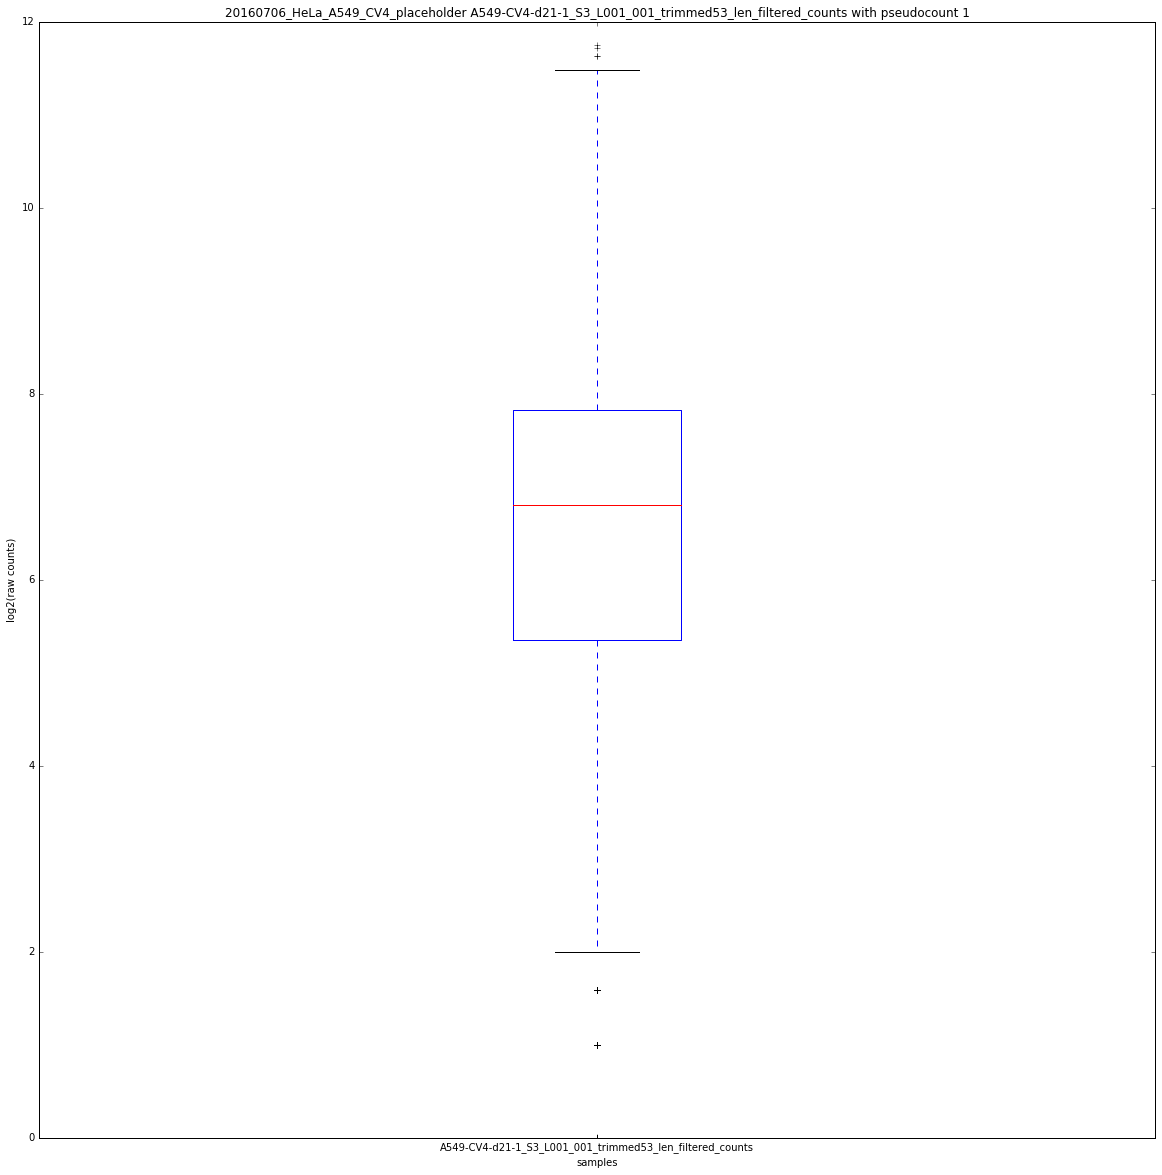

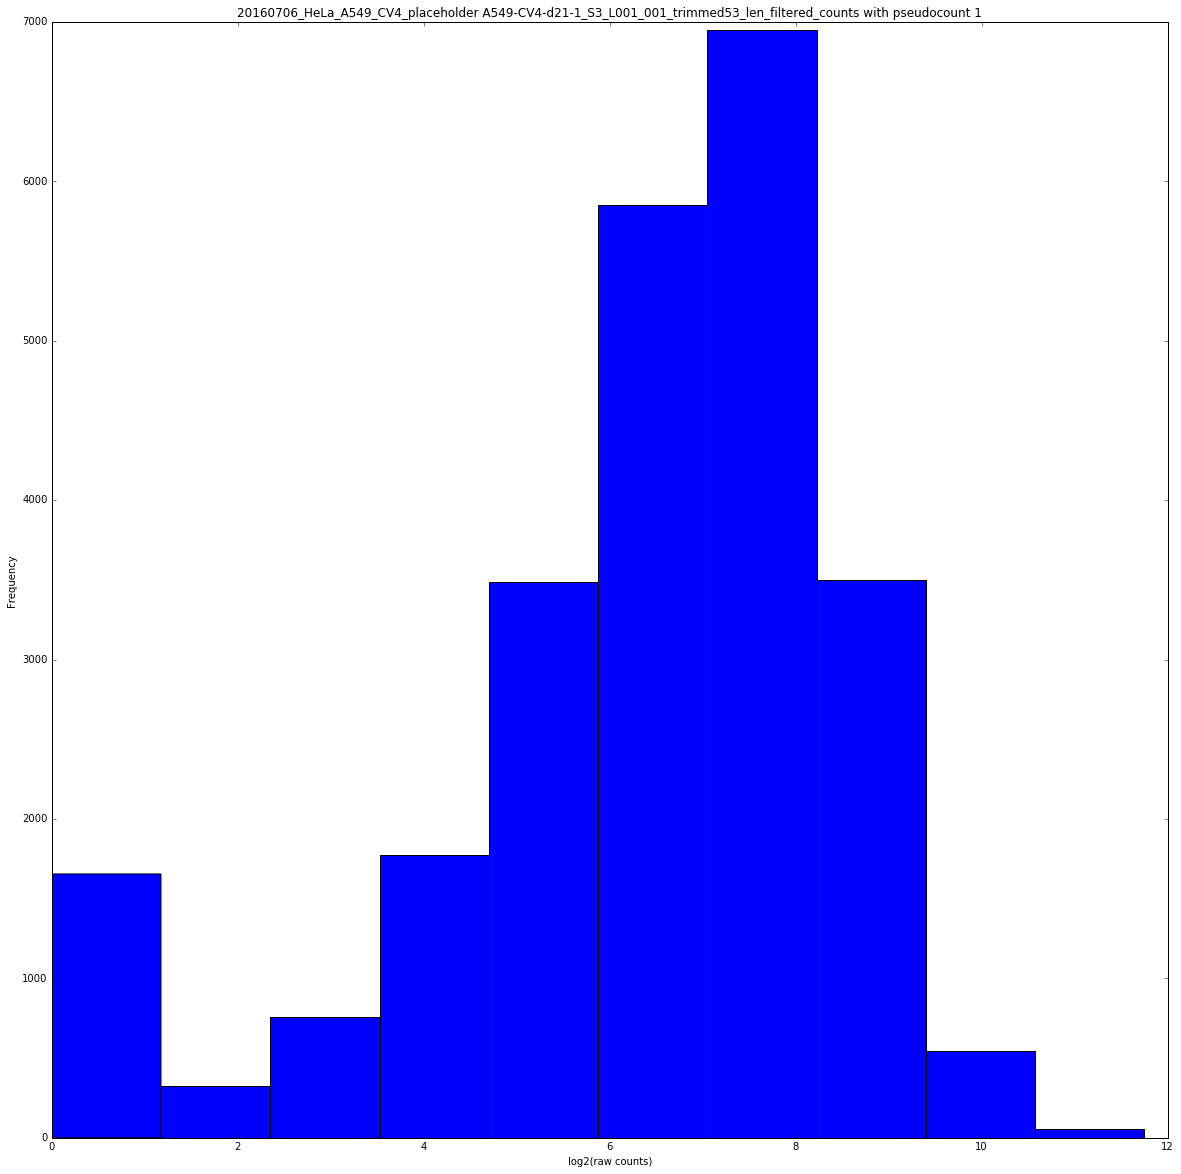

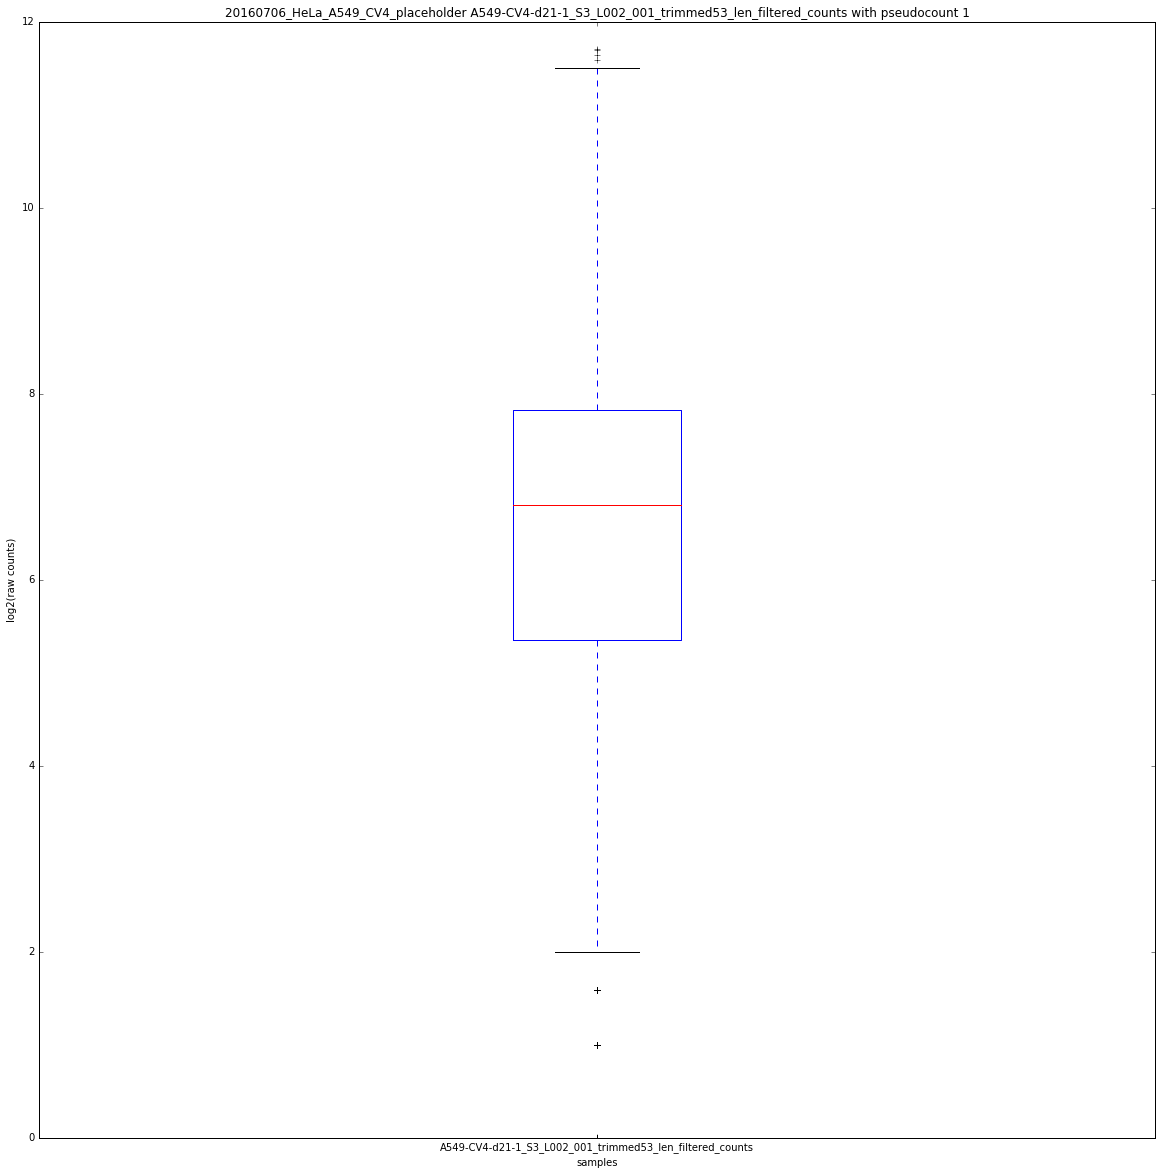

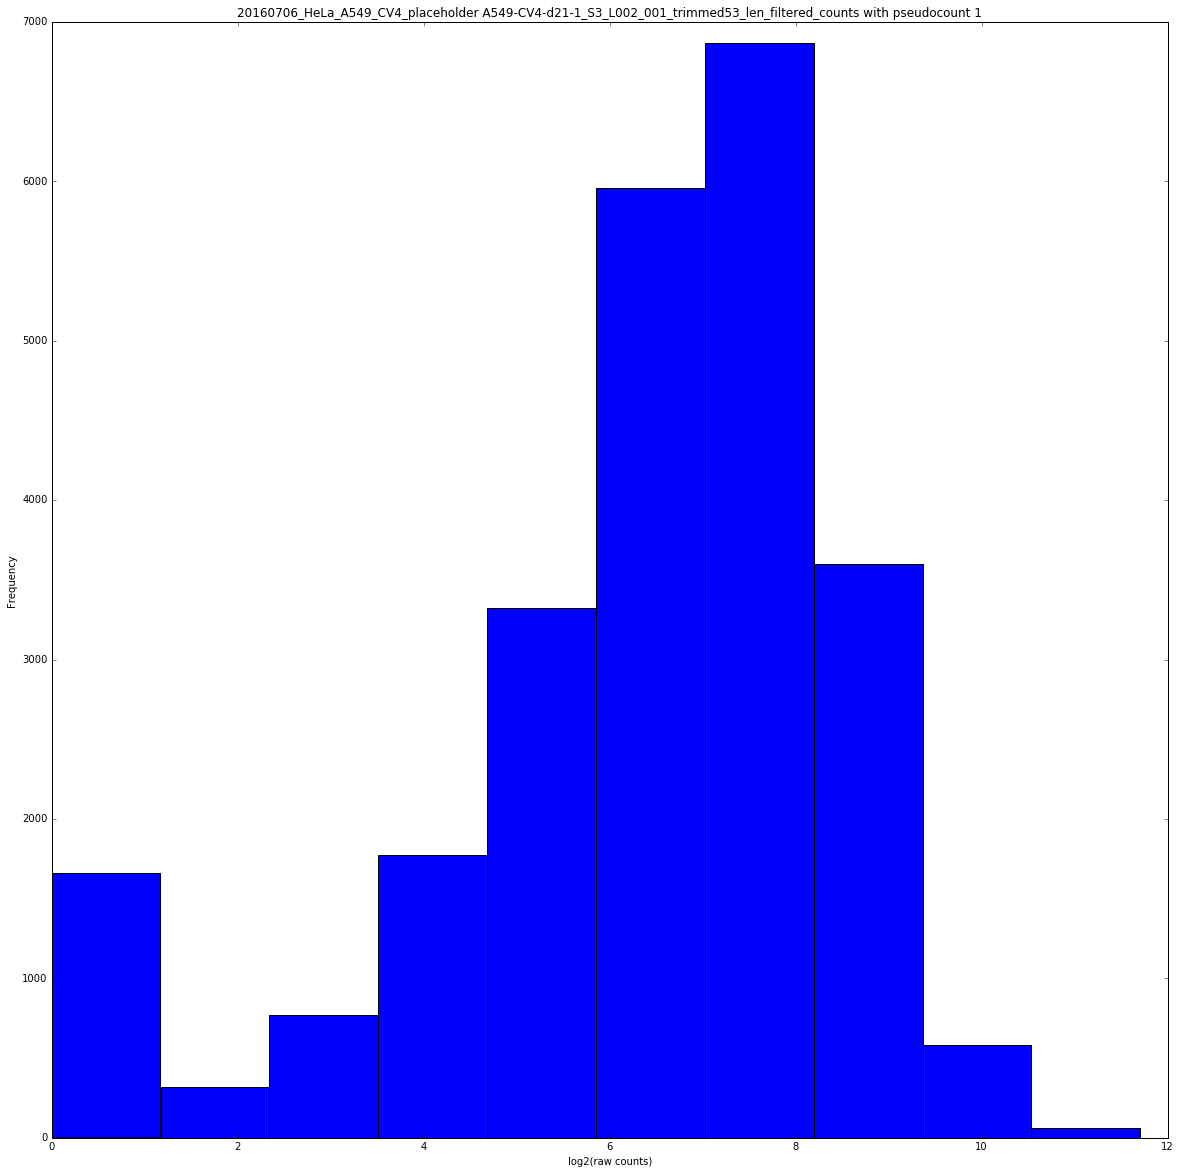

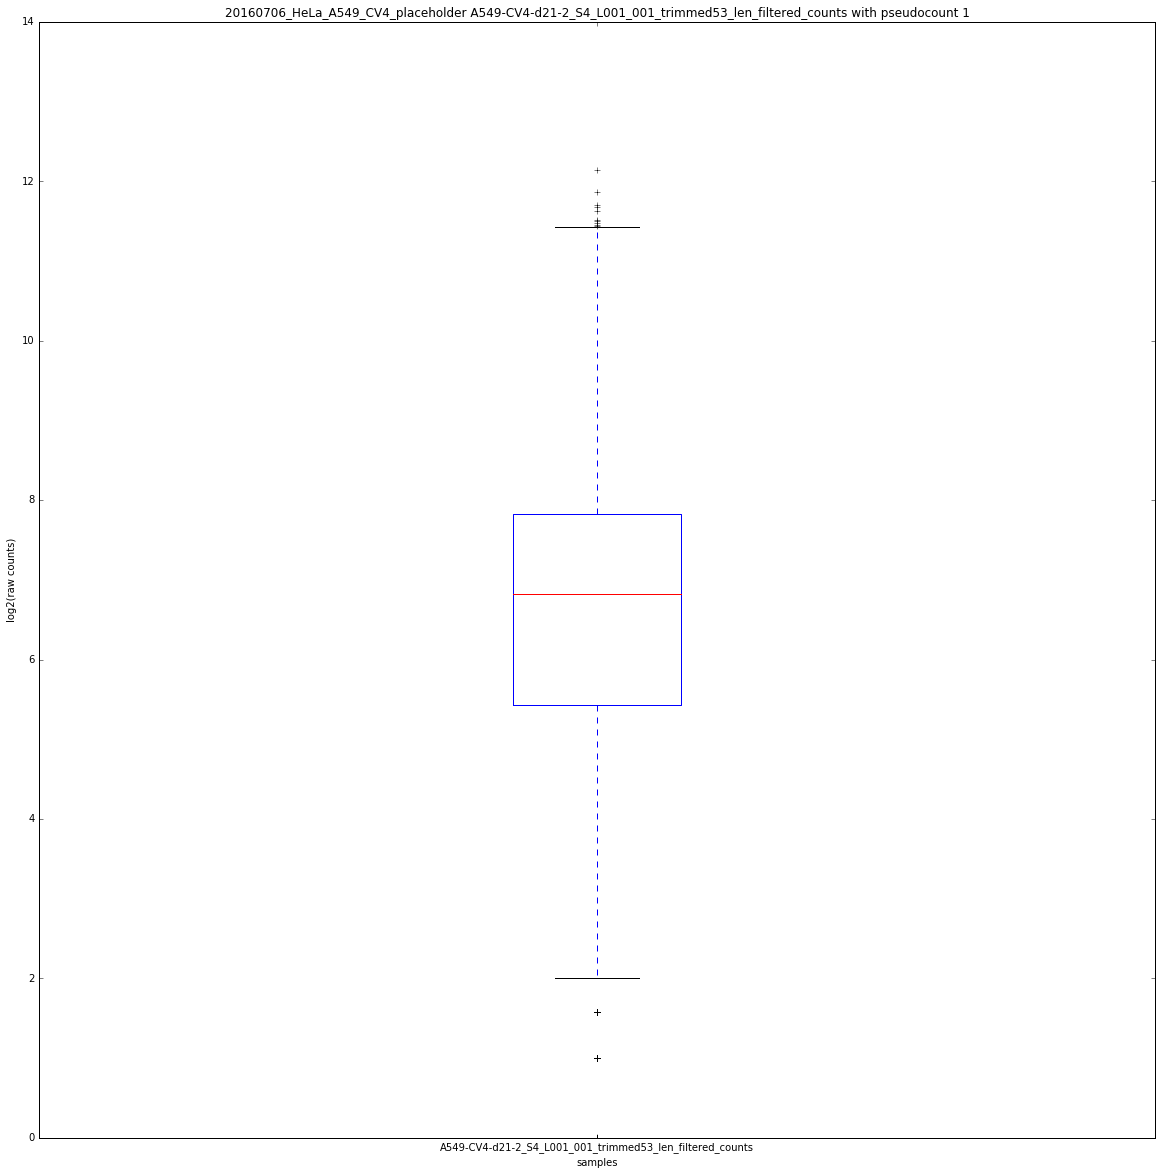

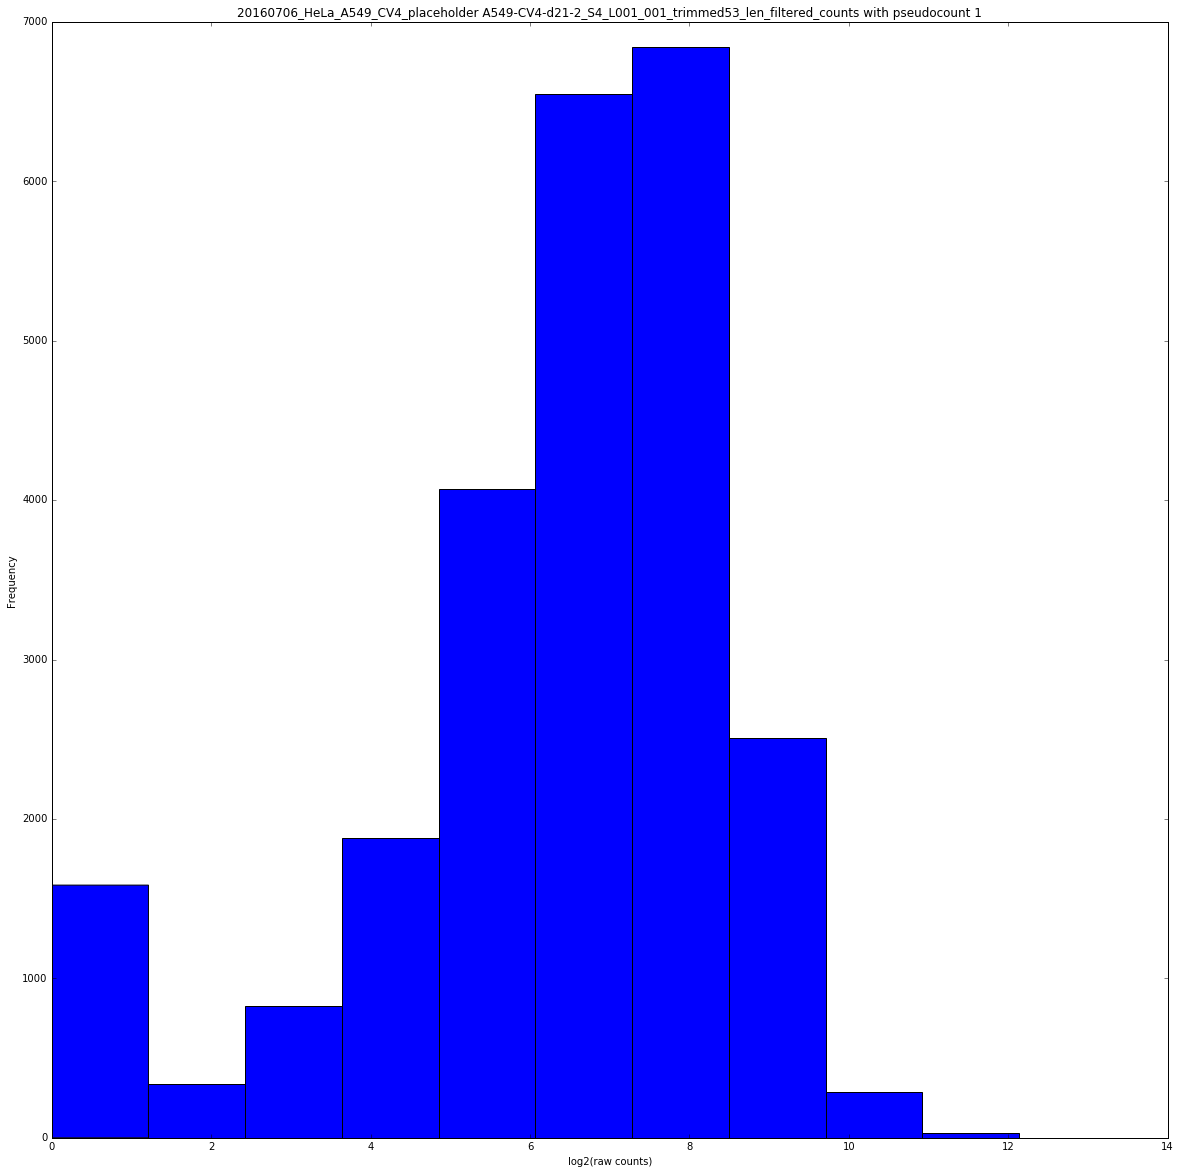

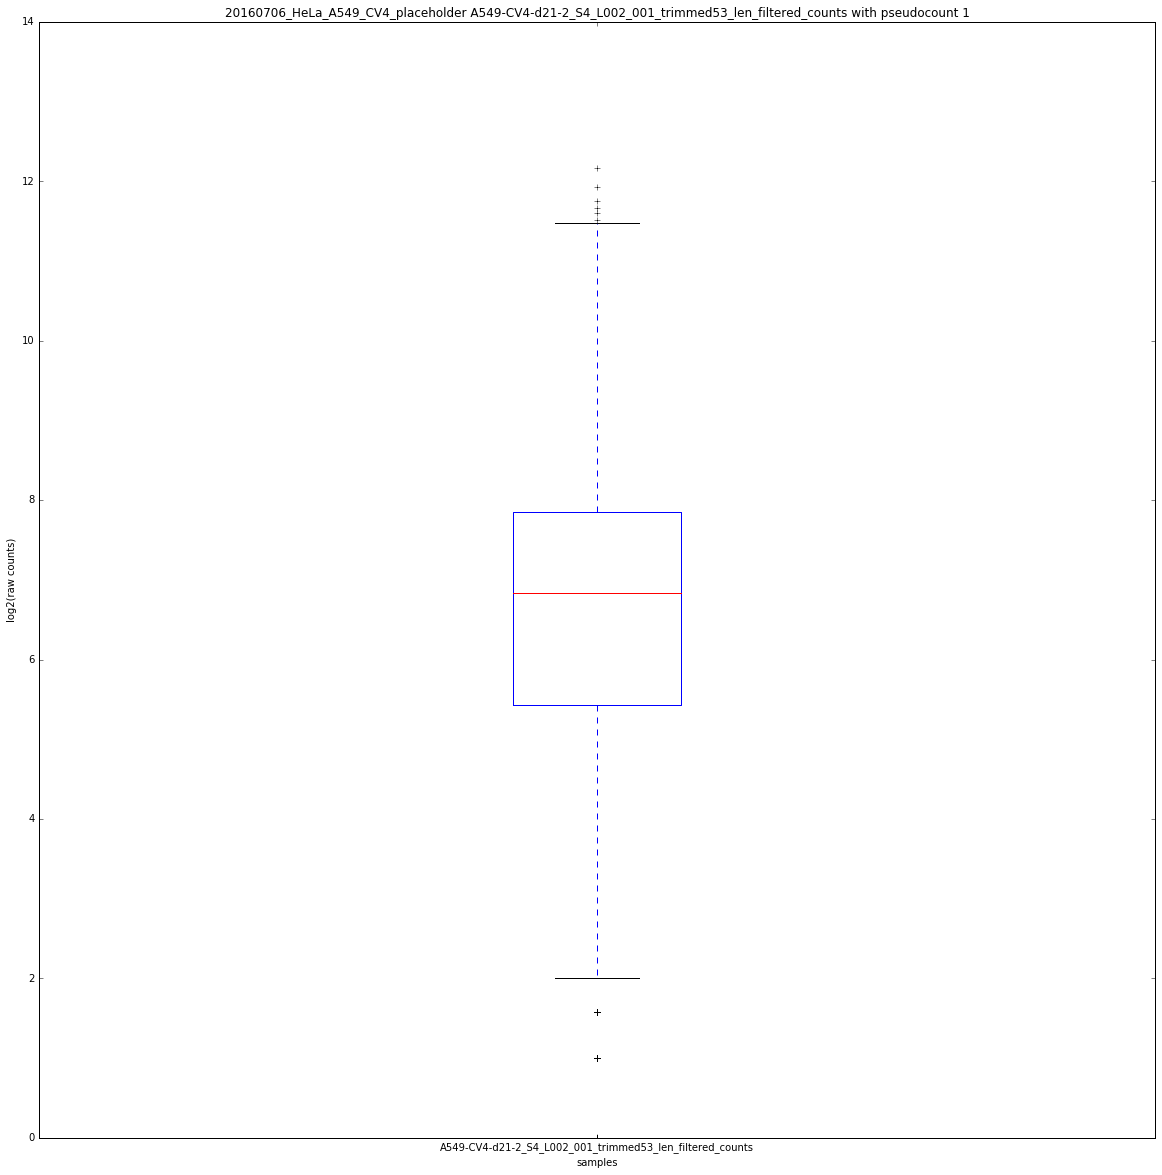

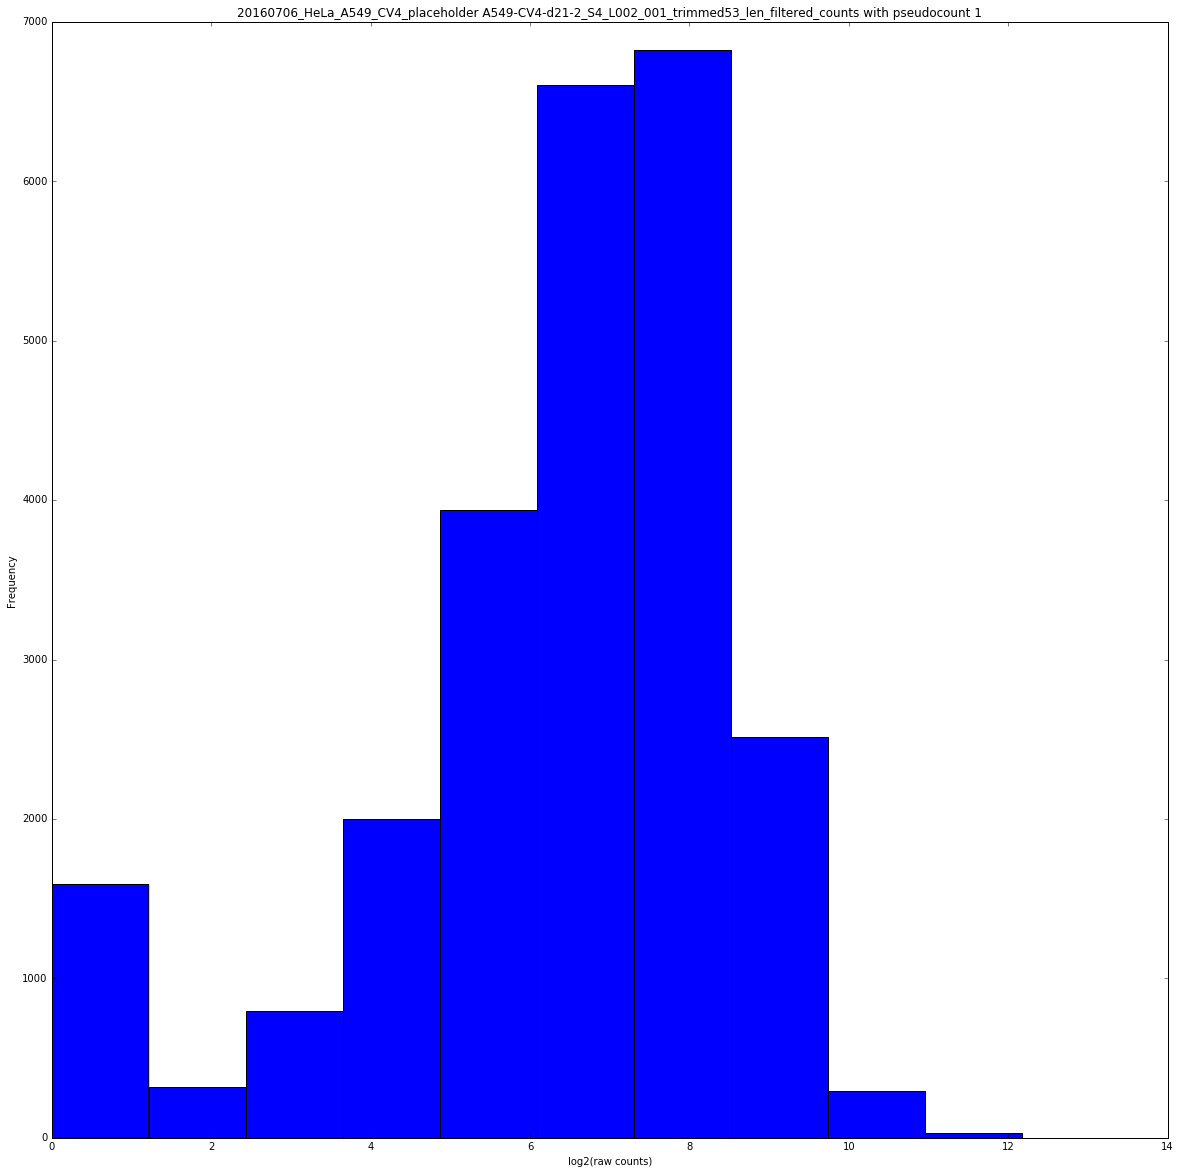

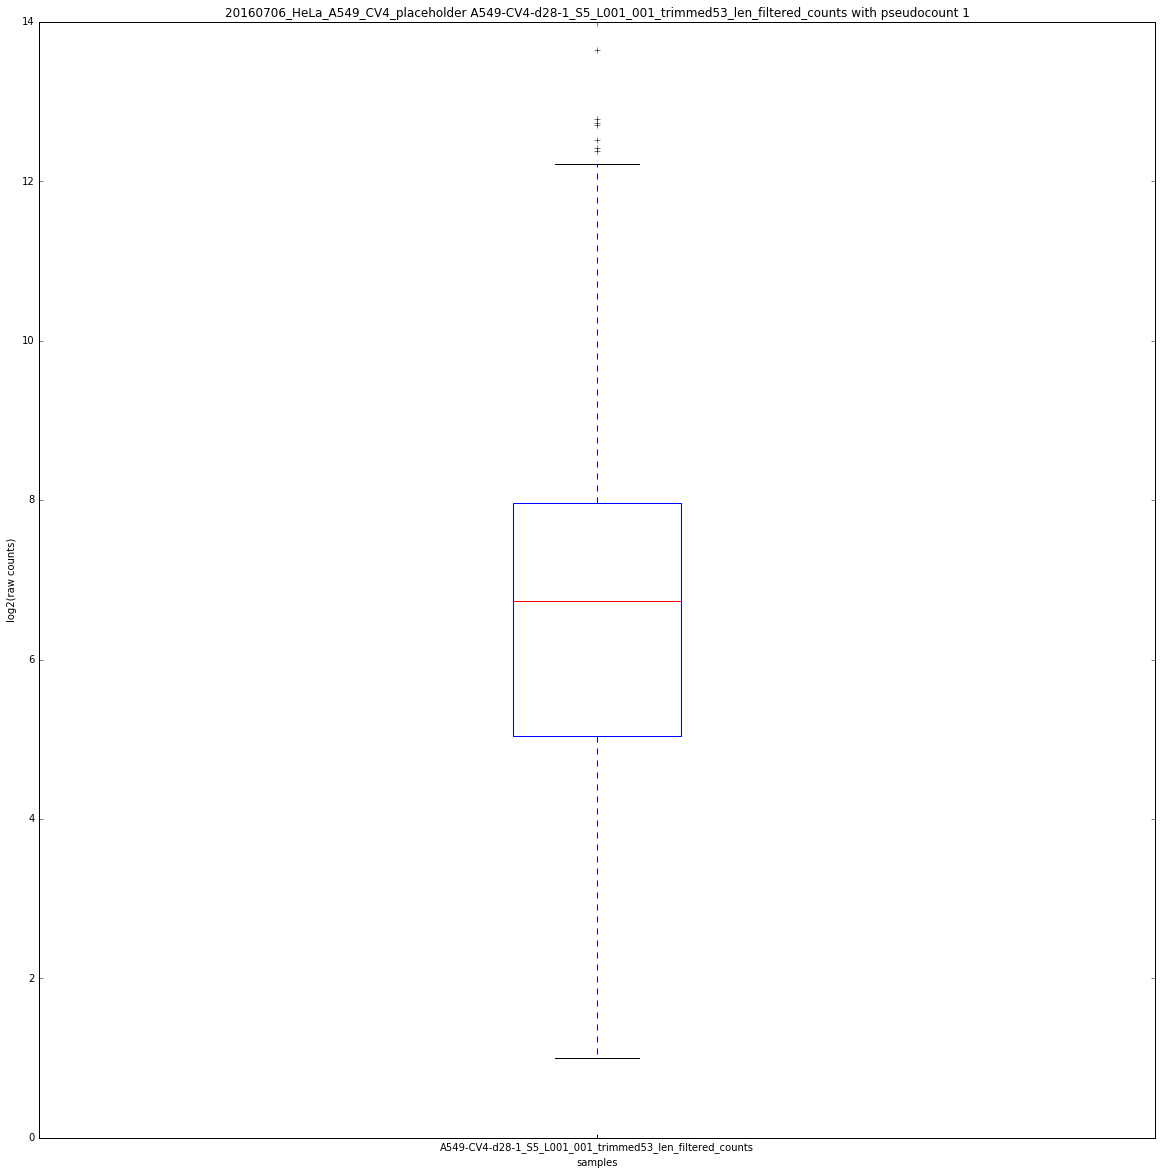

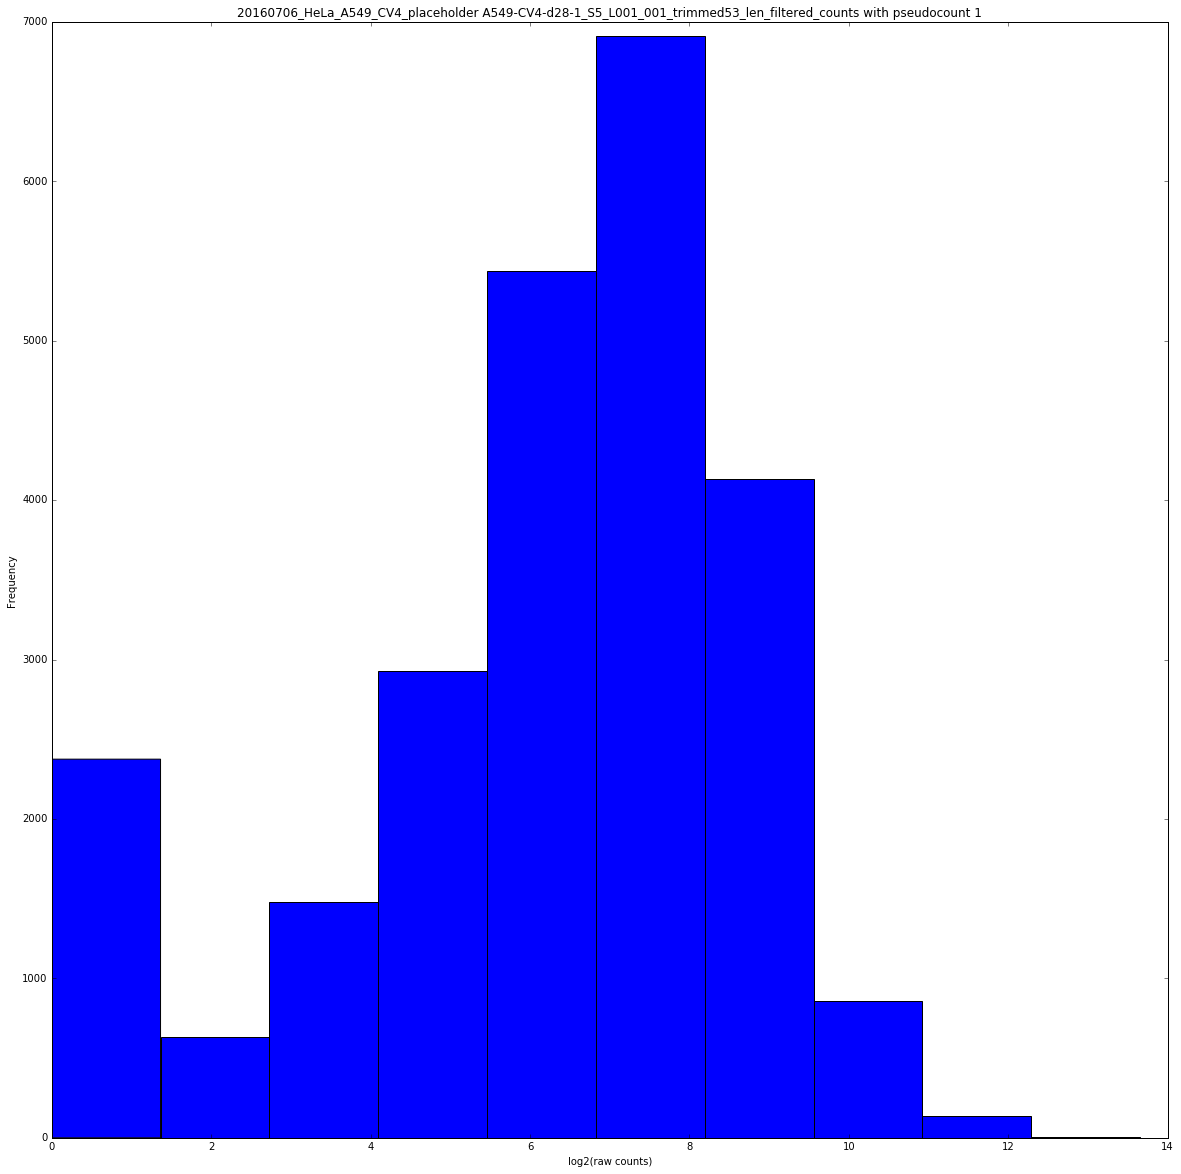

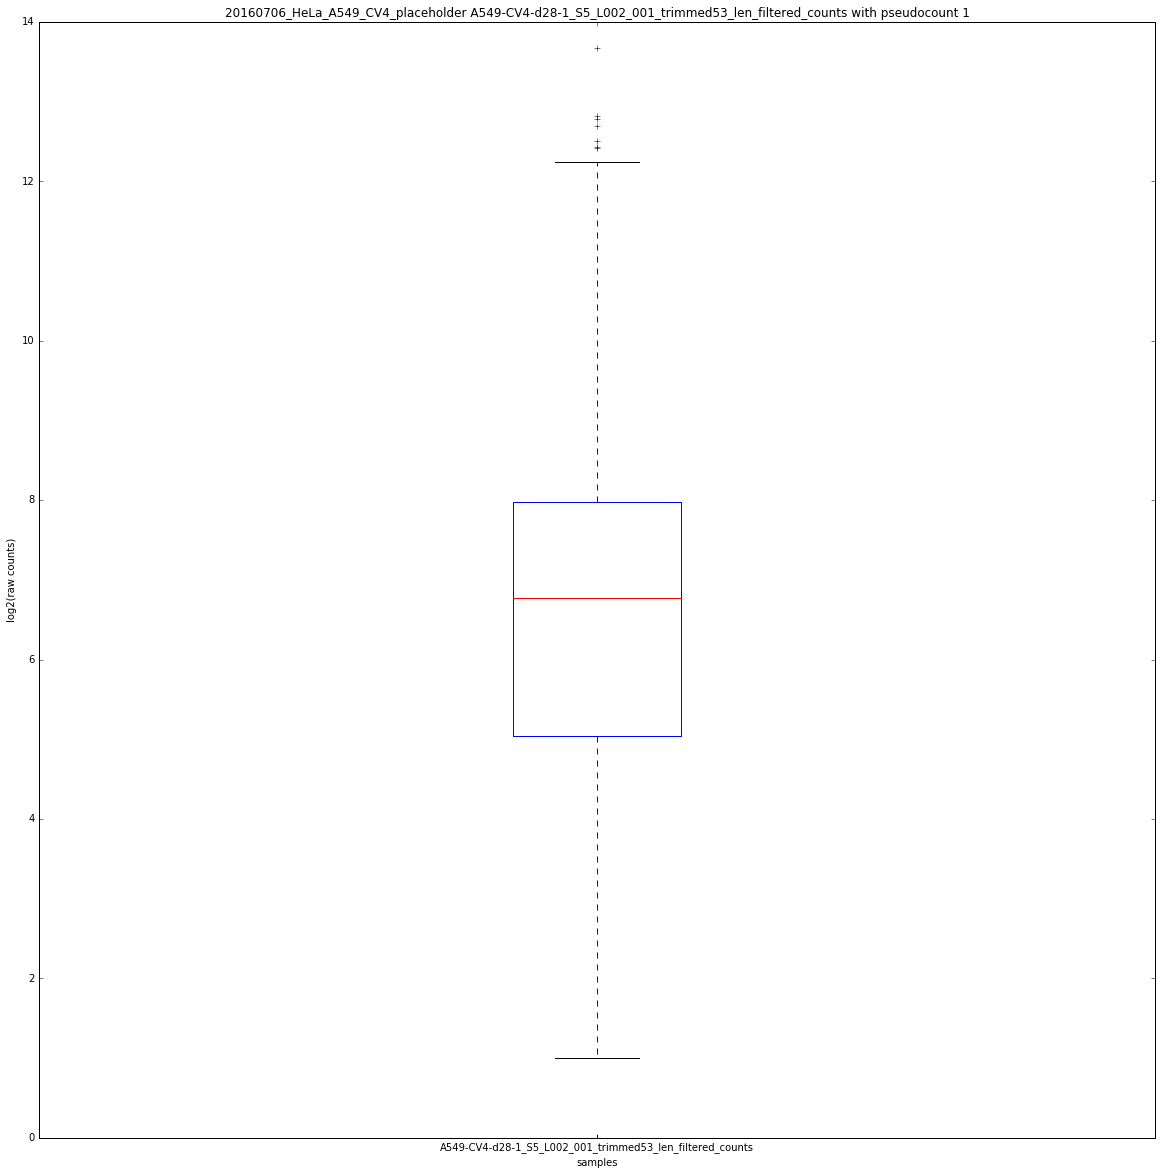

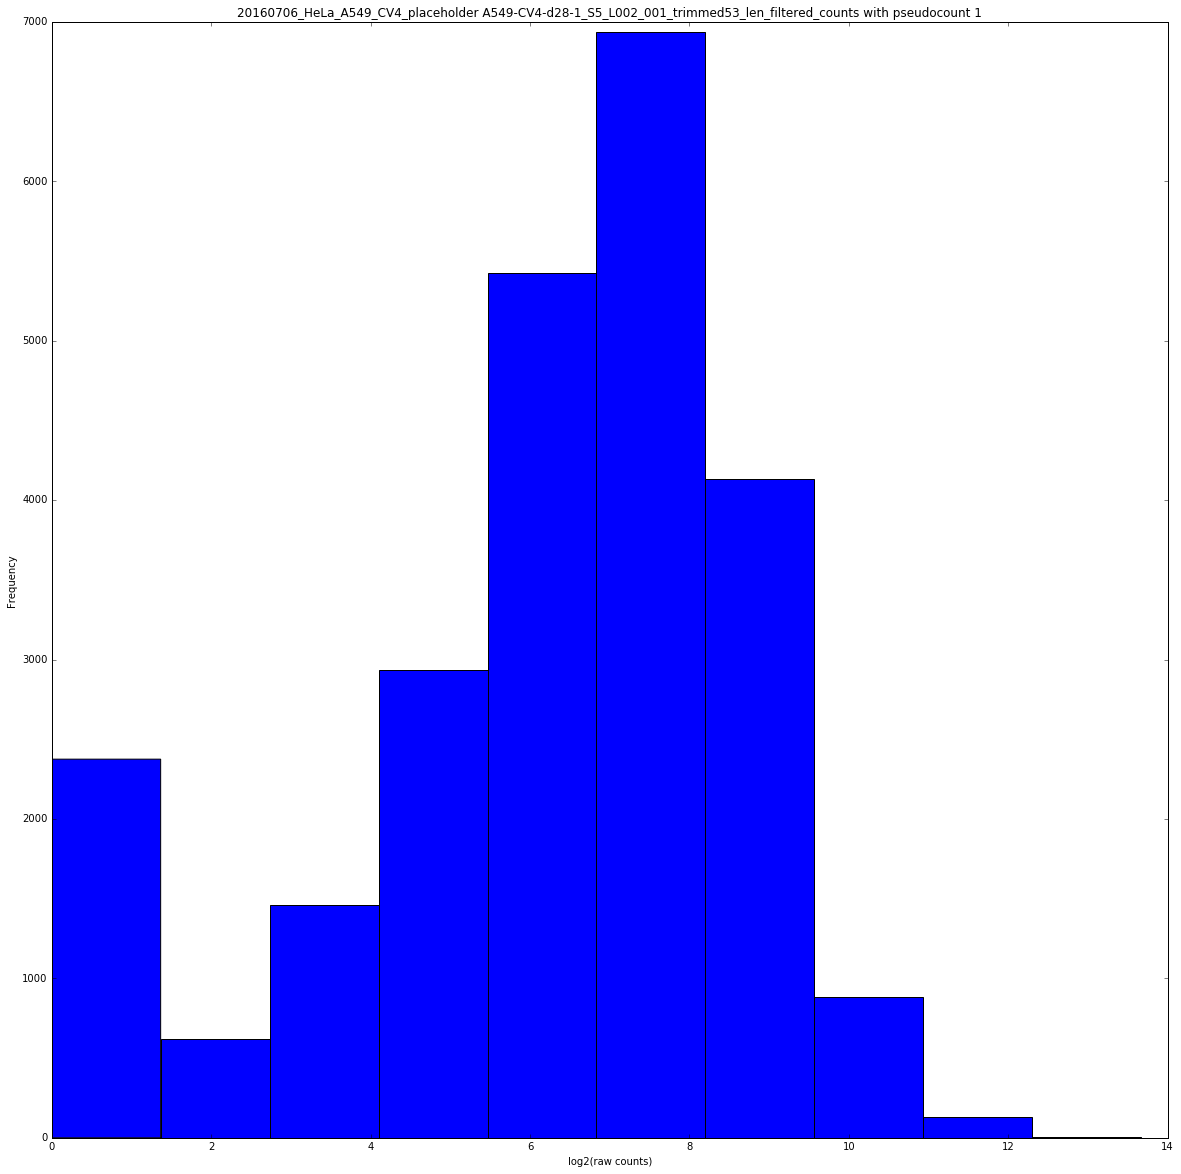

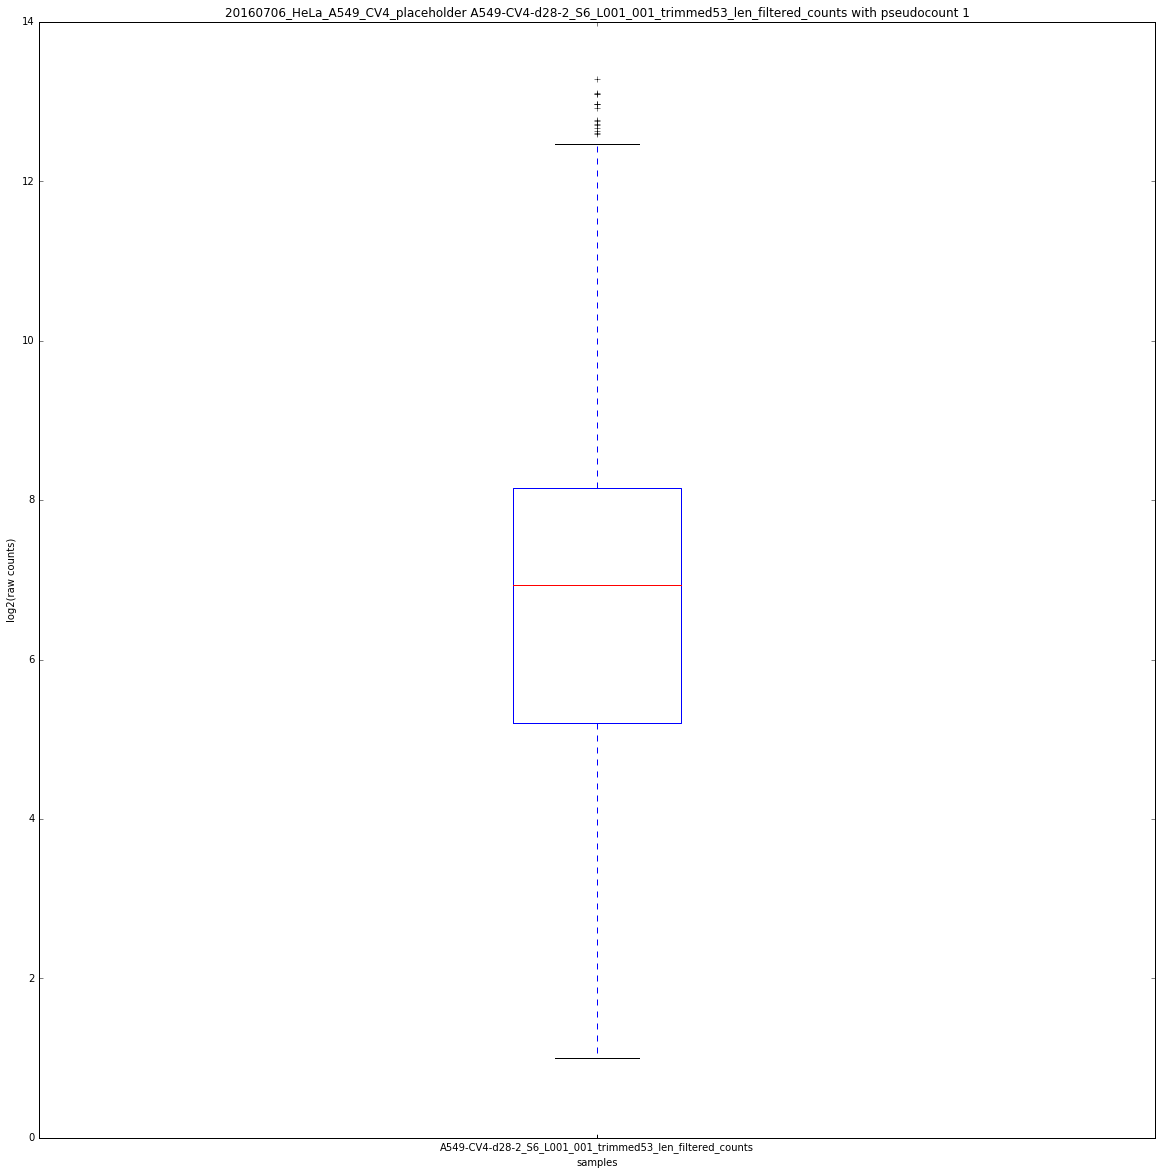

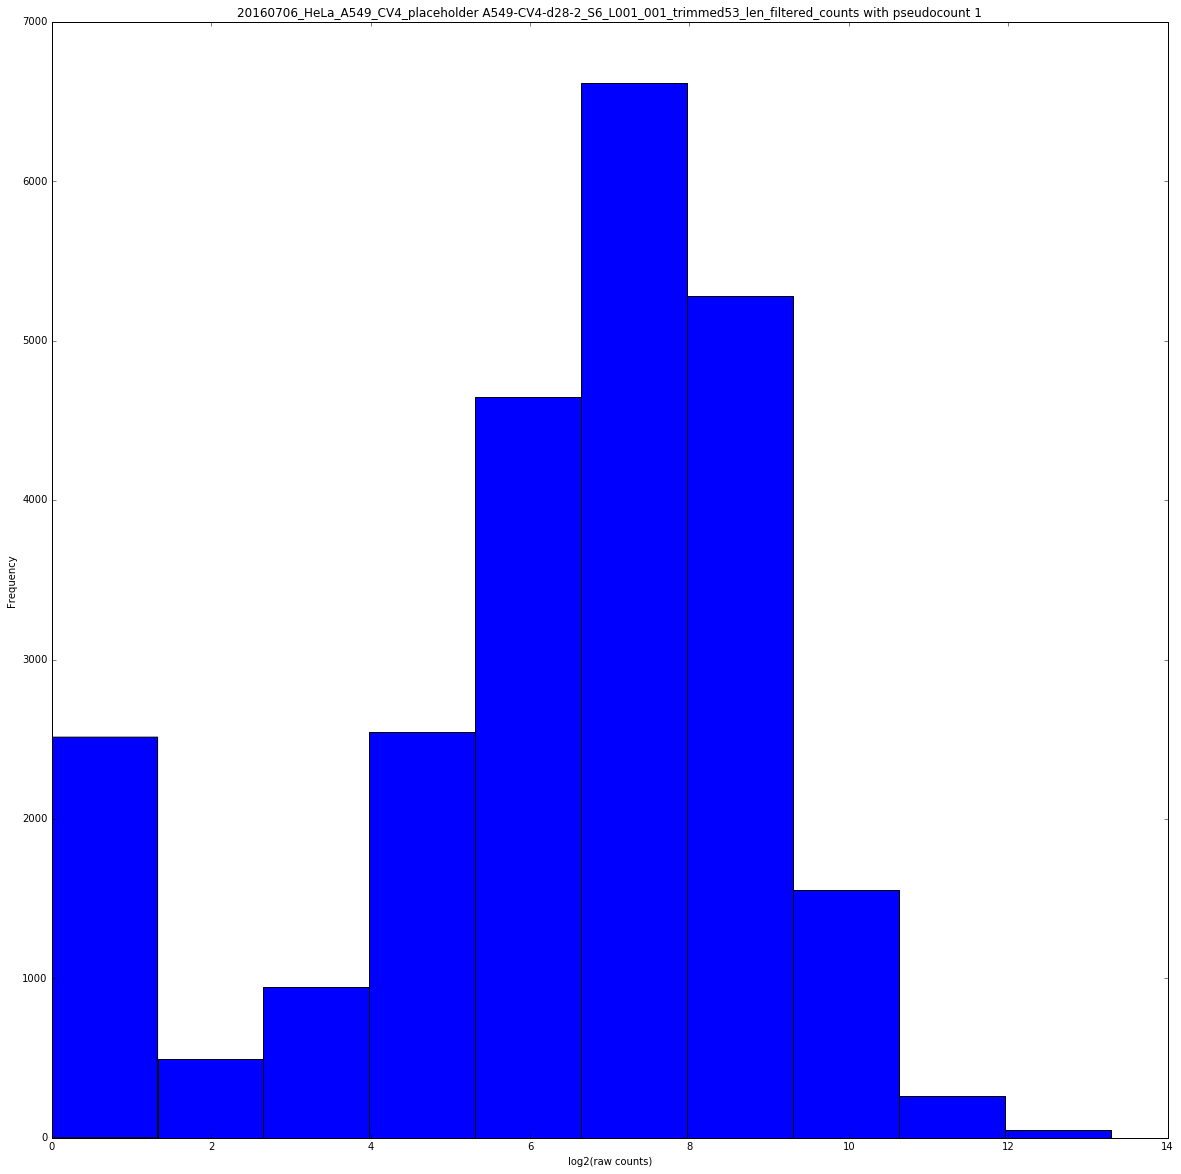

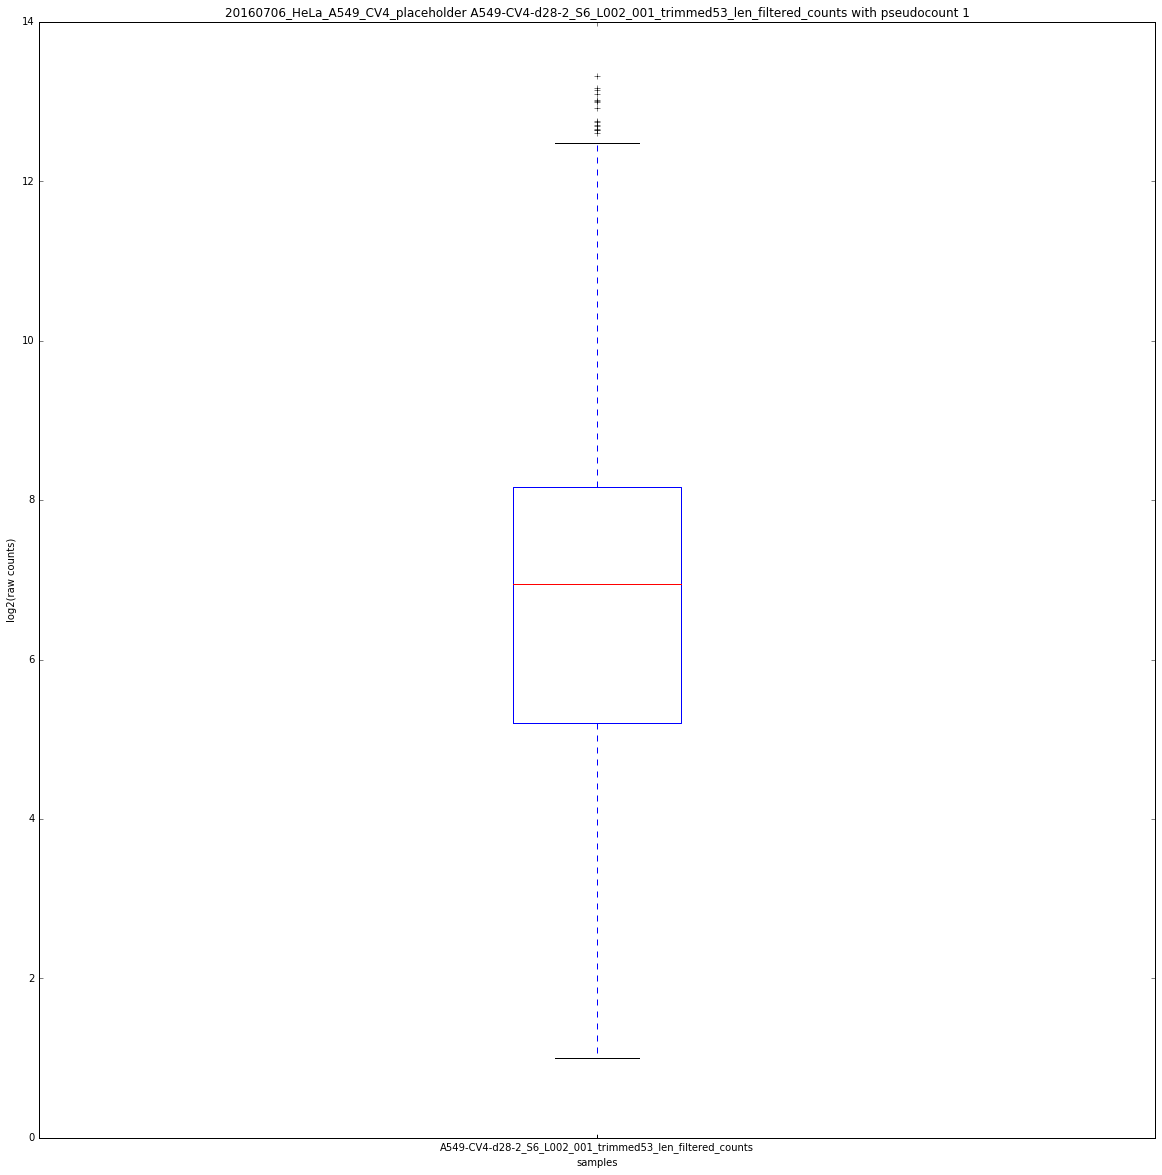

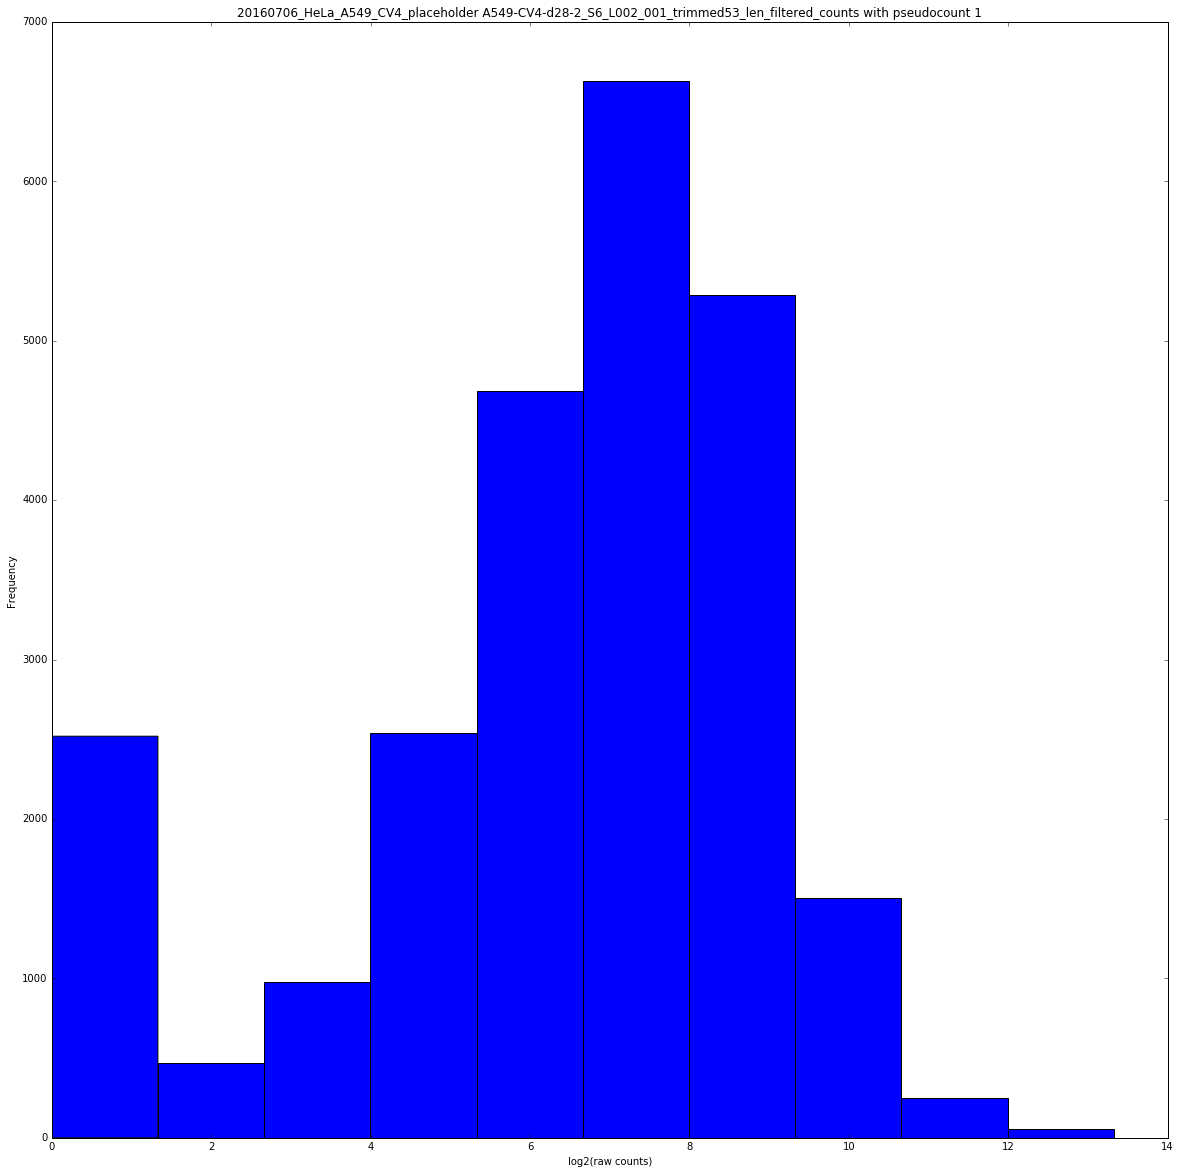

In [9]:
ns_plot.plot_raw_counts(g_fastq_counts_dir, g_fastq_counts_run_prefix, ns_counter.get_counts_file_suffix(), 
    g_plots_dir, g_plots_run_prefix, ns_plot.get_boxplot_suffix())

## Individual Sample Plots

In [10]:
print(ns_files.summarize_filenames_for_prefix_and_suffix(g_collapsed_counts_dir, g_collapsed_counts_run_prefix, 
                                        ns_combine.get_collapsed_counts_file_suffix()))

20160706_HeLa_A549_CV4_placeholder_A549-CV4-d21-1_S3_trimmed53_len_filtered_counts_collapsed.txt
20160706_HeLa_A549_CV4_placeholder_A549-CV4-d21-2_S4_trimmed53_len_filtered_counts_collapsed.txt
20160706_HeLa_A549_CV4_placeholder_A549-CV4-d28-1_S5_trimmed53_len_filtered_counts_collapsed.txt
20160706_HeLa_A549_CV4_placeholder_A549-CV4-d28-2_S6_trimmed53_len_filtered_counts_collapsed.txt


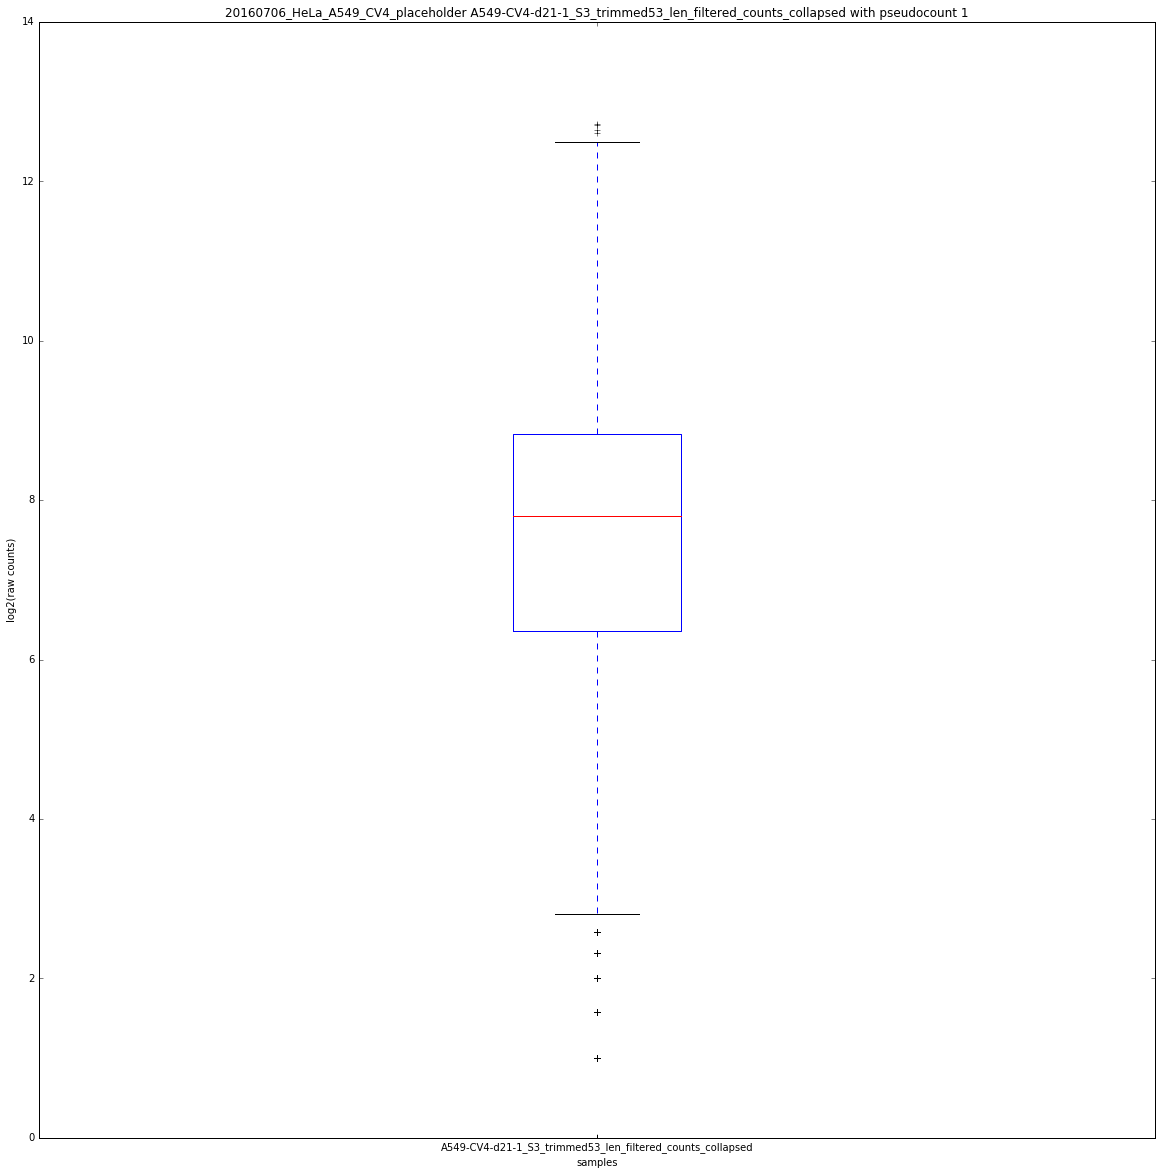

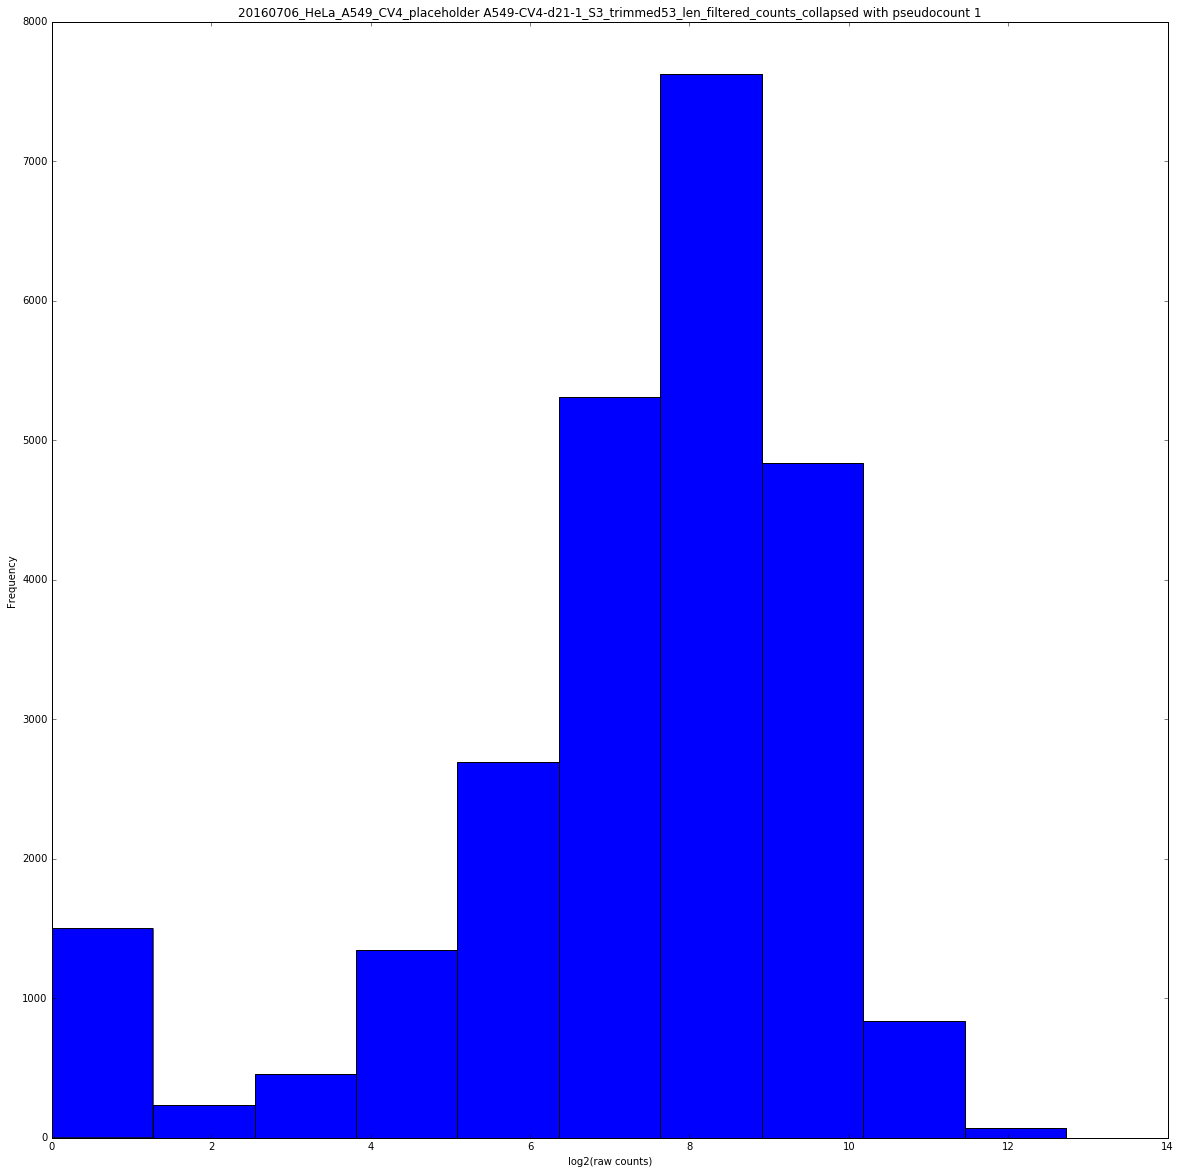

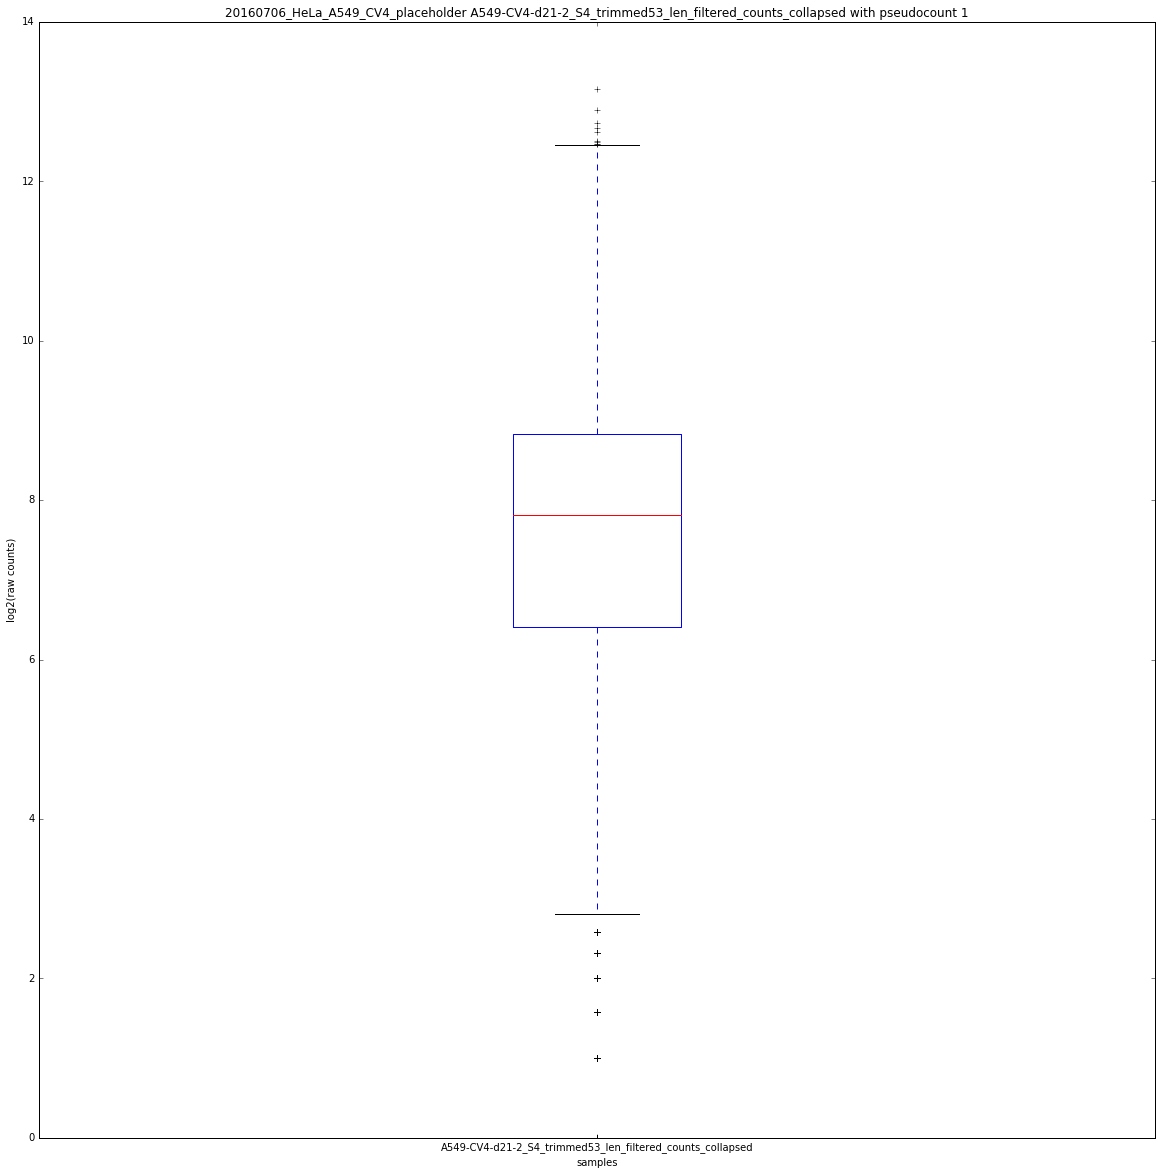

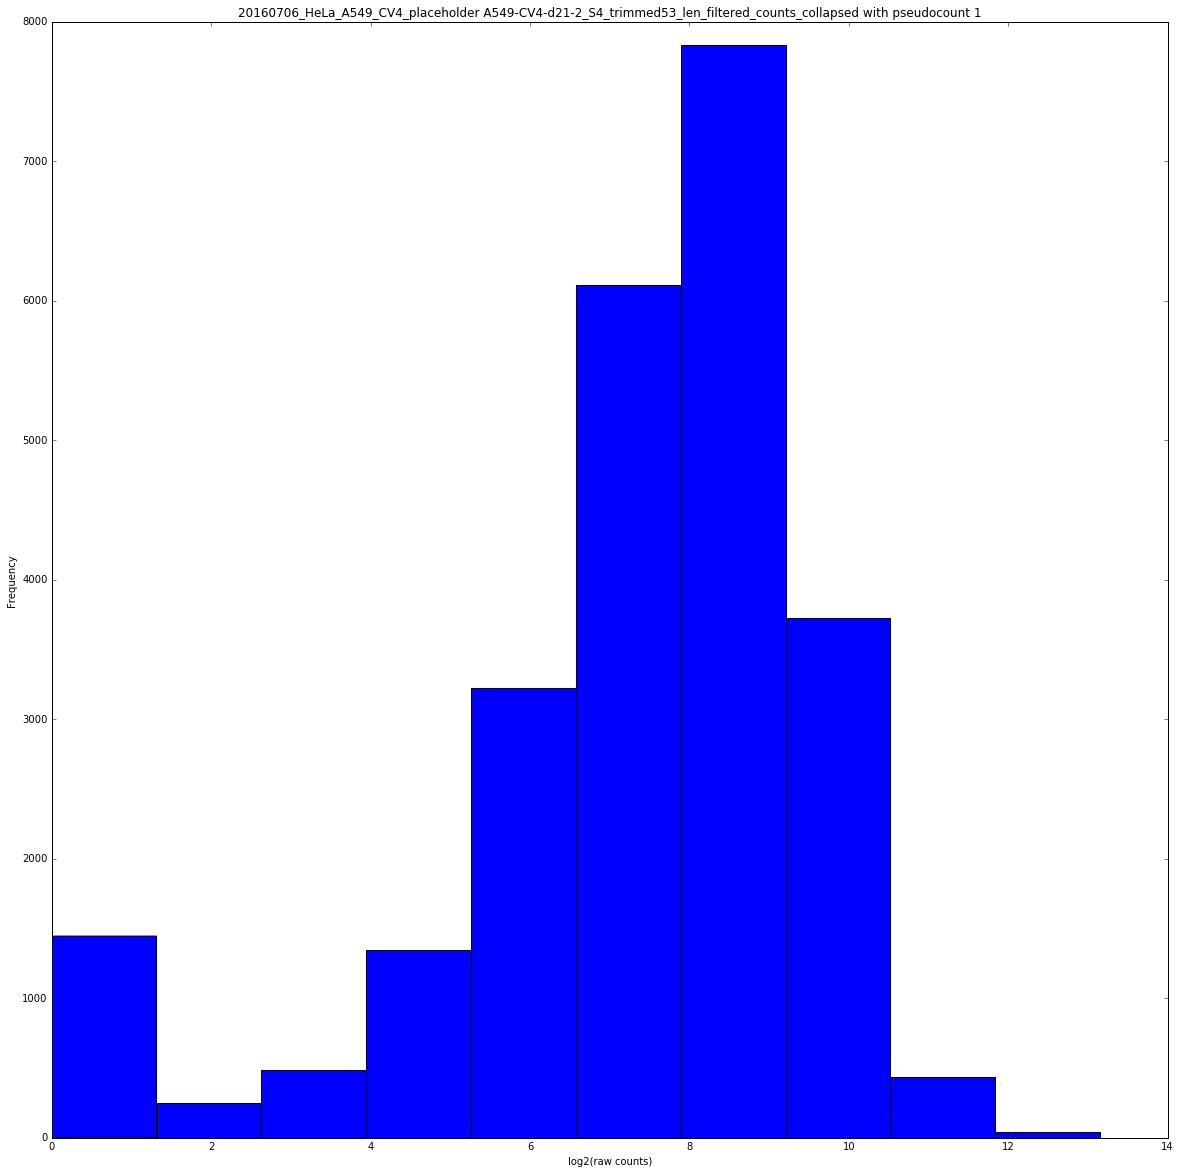

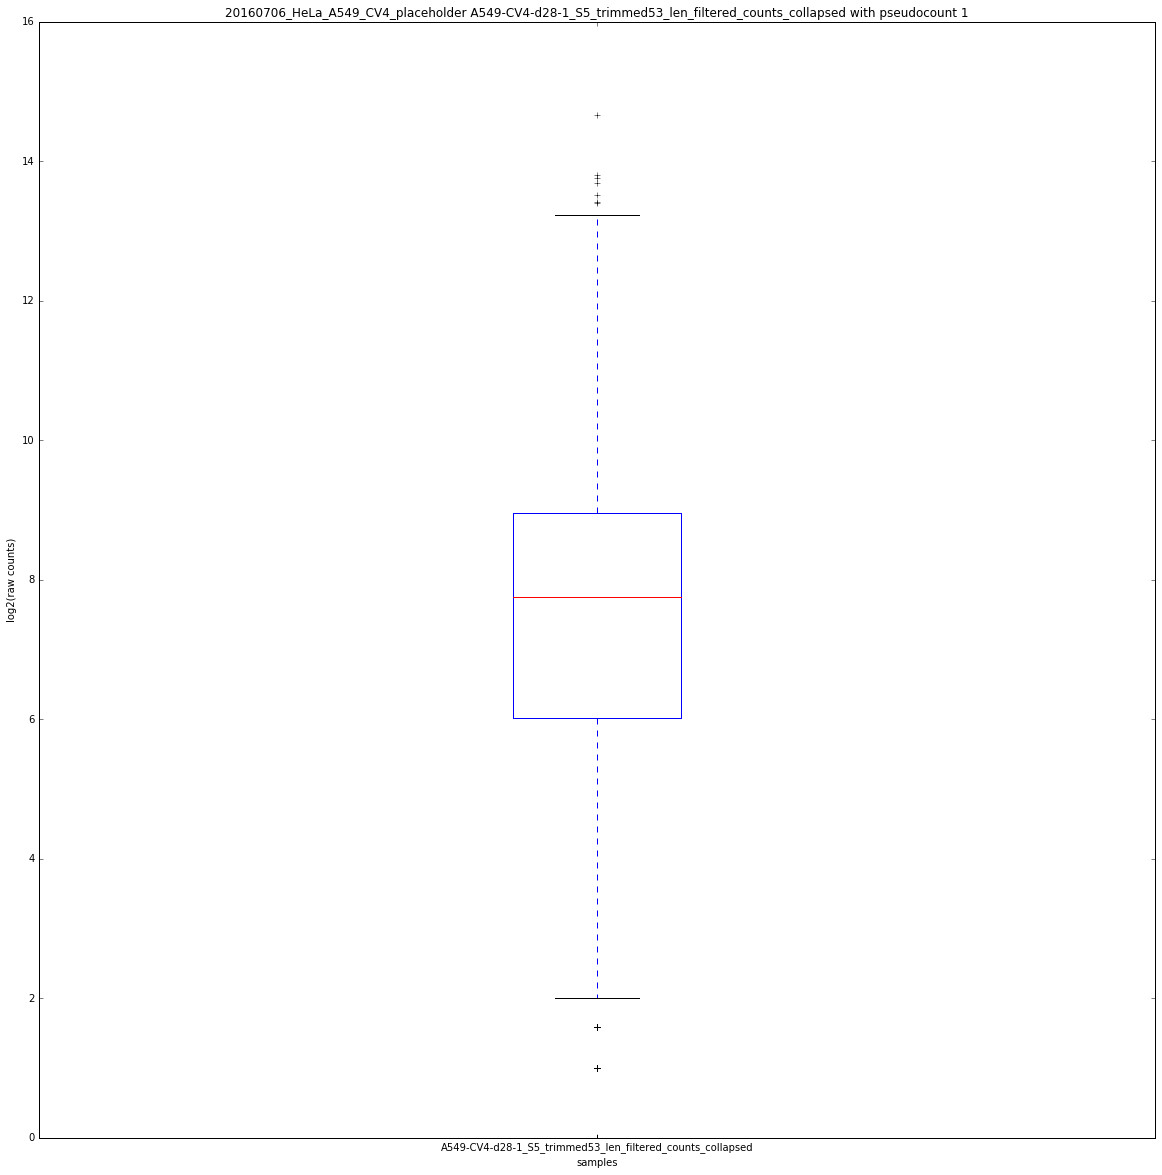

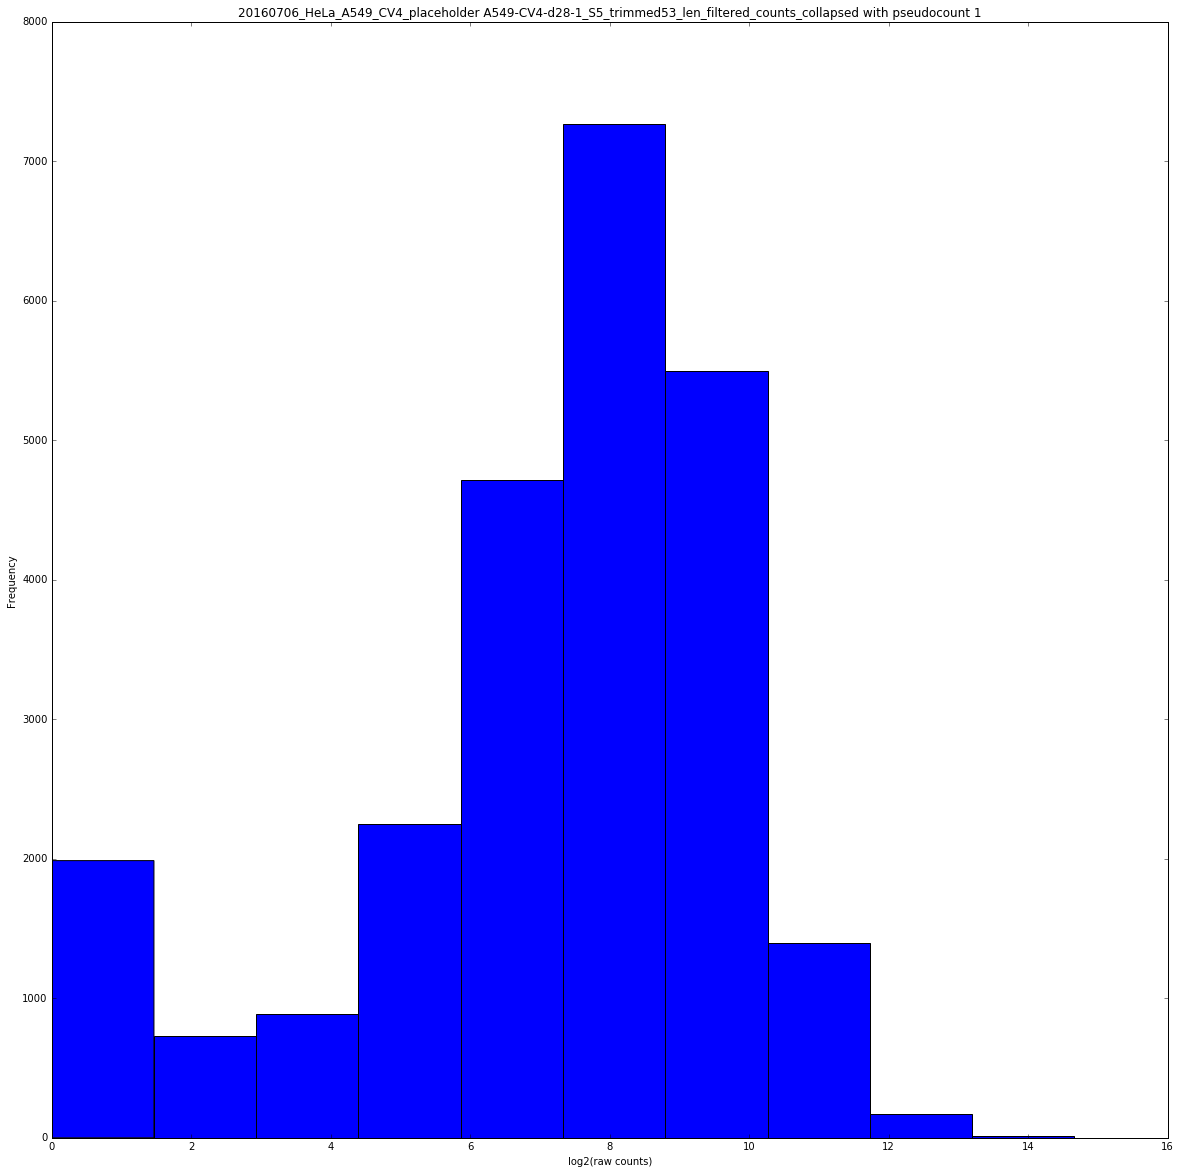

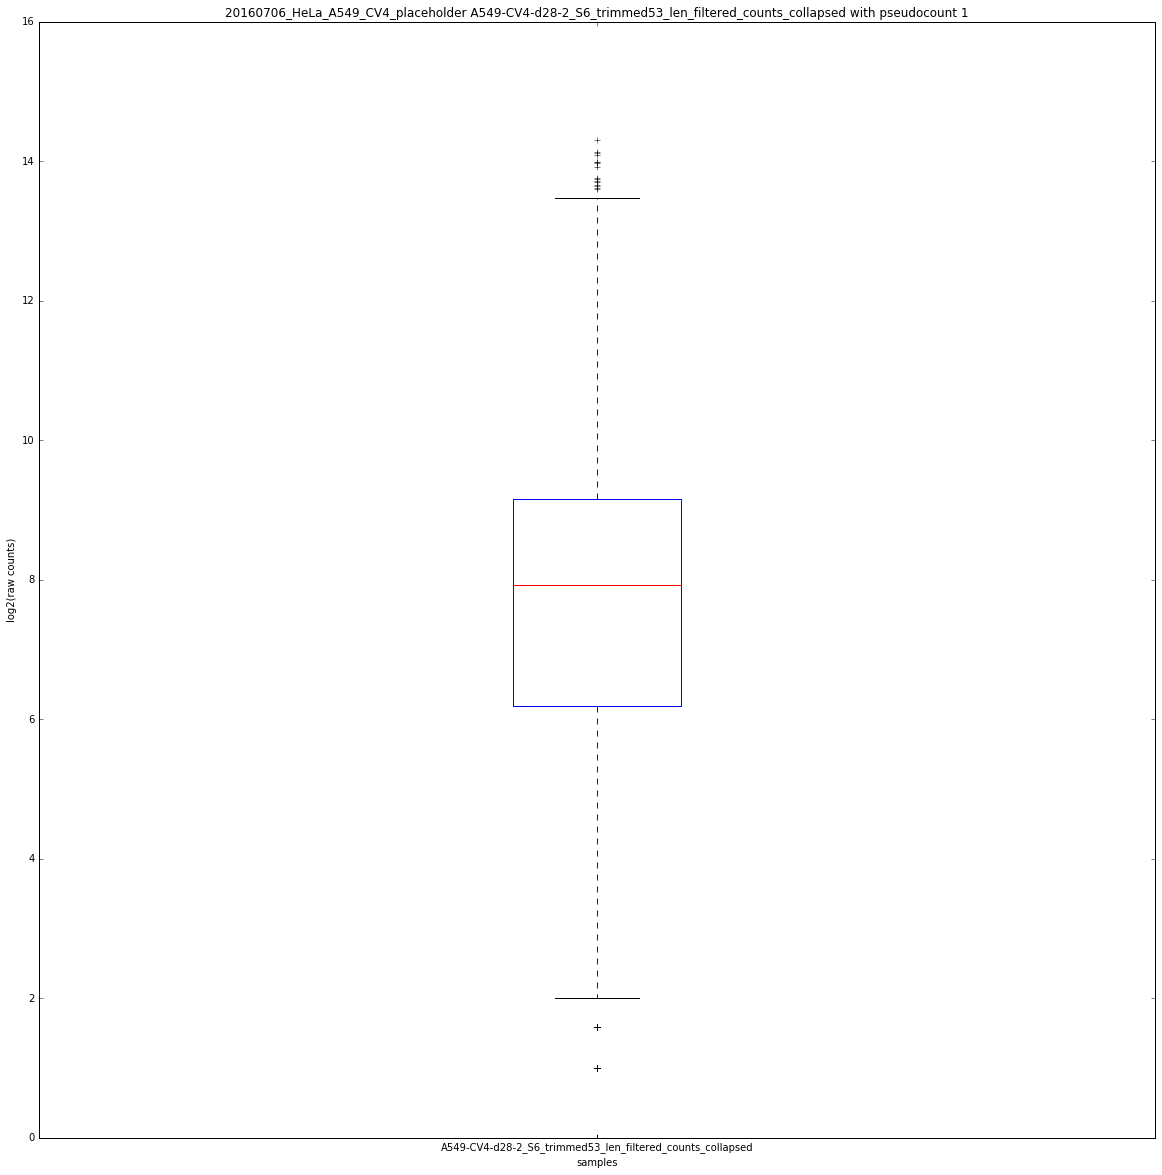

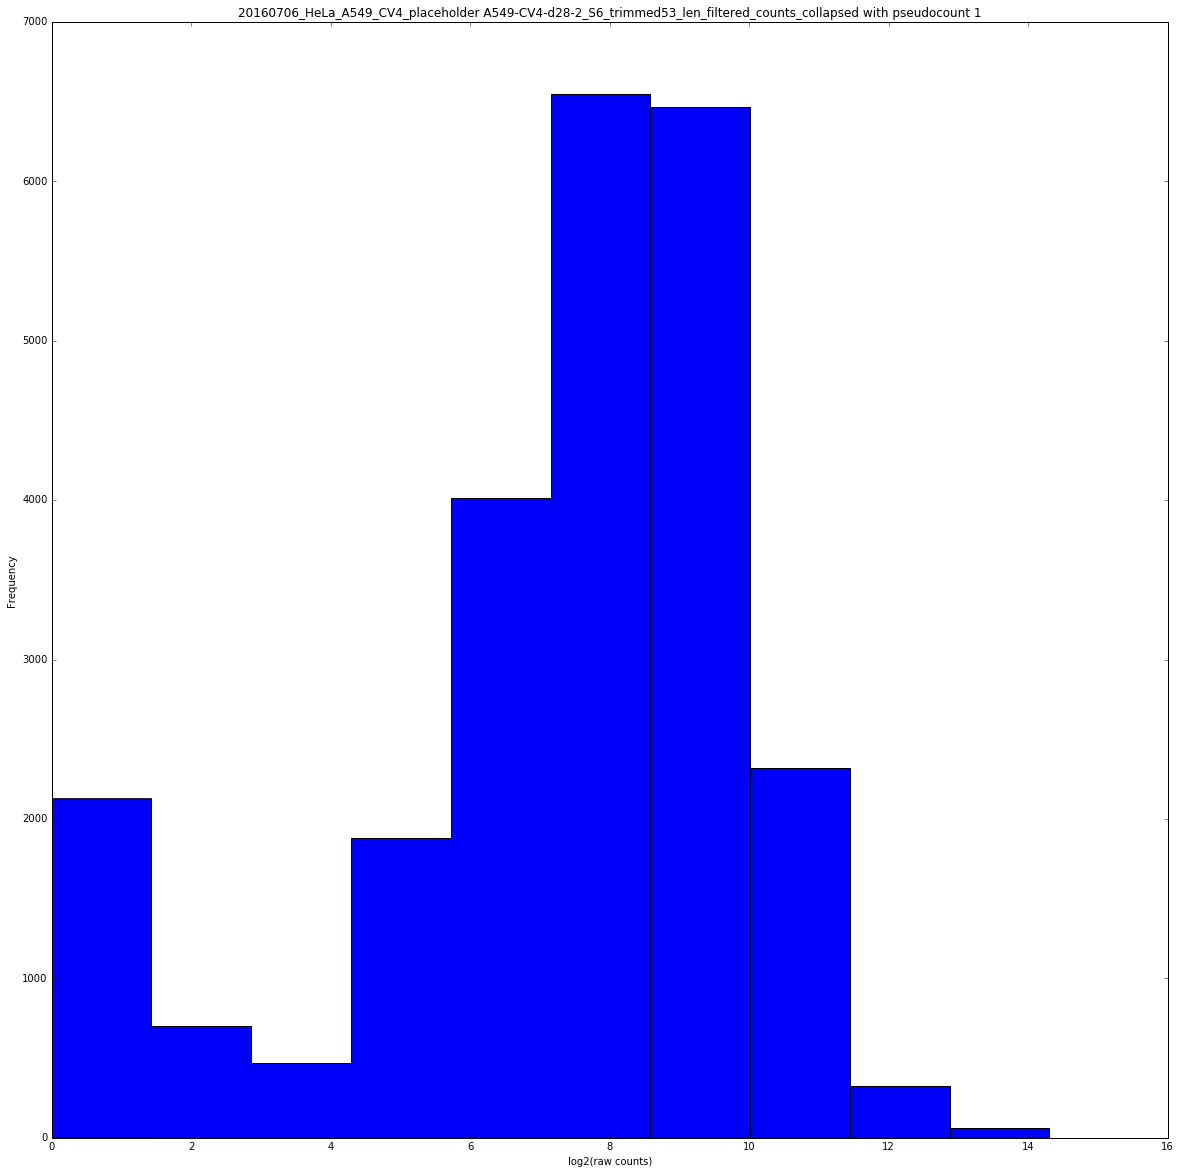

In [11]:
ns_plot.plot_raw_counts(g_collapsed_counts_dir, g_collapsed_counts_run_prefix, 
    ns_combine.get_collapsed_counts_file_suffix(), g_plots_dir, g_plots_run_prefix, ns_plot.get_boxplot_suffix())

## Combined Samples Plot

In [12]:
print(ns_files.summarize_filenames_for_prefix_and_suffix(g_combined_counts_dir, g_combined_counts_run_prefix, 
                                        ns_combine.get_combined_counts_file_suffix()))

20160706_HeLa_A549_CV4_placeholder_counts_combined.txt


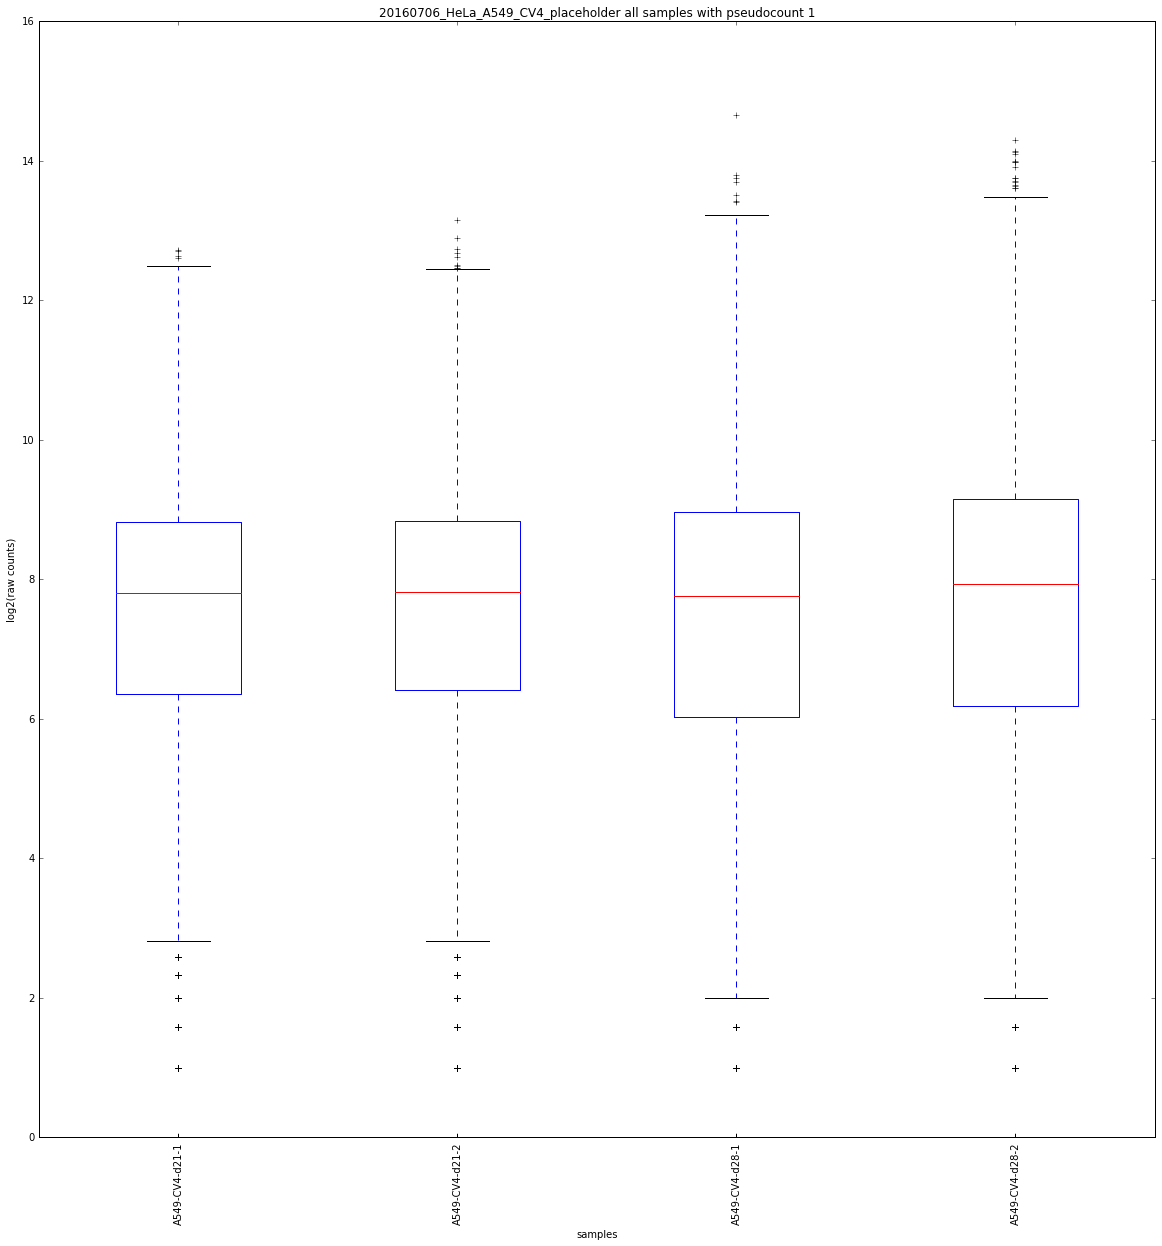

In [13]:
ns_plot.plot_combined_raw_counts(g_combined_counts_dir, g_combined_counts_run_prefix, 
    ns_combine.get_combined_counts_file_suffix(), g_plots_dir, g_plots_run_prefix, ns_plot.get_boxplot_suffix())